Irene Claes r0627946

# ChiP-seq: TRIB3 promotes MYC-associated lymphoma development through suppression of UBE3B-mediated MYC degradation

## Overview:
1. Dataset
2. Retrieving fastQ files 
3. Quality Check
4. Alignment of PCON and PCM4 reads 
5. Genome-wide Coverage plots
6. Genome-wide peak calling
7. Heatmap
8. Motif Analysis
9. Position Weight Matrices and Track Enrichtment 
10. Linking peaks to genes - GREAT
11. Predicted target genes and functional associations to MYC
12. Conclusion

## 1. Dataset

### 1.1. Description: GEO dataset: GSE143865

The MYC gene is a proto-oncogene encoding a nuclear phosphoprotein. It is a transcription factor that plays a role in cell cycle progression, apoptosis and cellular transformation. Together with the transcription factor MAX, the encoded protein forms a heterodimer. This complex binds to the E-box DNA consensus sequence and regulates the transcription of specific target genes. In addition, the amplification of this gene is often observed in cancers, where it stimulates the growth of cancer cells. It is commonly observed in patients with Burkitt's lymphoma and multiple myeloma. The CHiPseq analysis examines how MYC expression can be controlled and to identify human MYC-regulated genes. 


TRIB3, tribbles pseudokinase 3, is a protein that acts as a stress sensor that responds to a wide range of stress, such as inflammation and insulin. It is known, among other things, as a crucial "stress-adjustment switch". It links homeostasis, metabolic disease and cancer by interacting with intracellular signaling and functional proteins. TRIB3 is seen as a potential therapeutic target for cancer because abolishing its expression drastically reduces tumorigenesis and cancer progression.

Datasets: 
* SRX7575890: IP-PCON_ChIPSeq
* SRX7575891: IP-PCM4_ChIPSeq
* SRX7575892: INPUT-PCON_ChIPSeq
* SRX7575893: INPUT-PCM4_ChIPSeq

PCM4 = fused peptide => To determine wether the CM4 (C-terminus of MYC) disturbs the TRIB3-MYC interaction in lymphoma cells
PCON = penetated control peptide 

### 1.2. Download:

* Article:  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7725785/
* Data: https://www.ncbi.nlm.nih.gov/sra?term=SRP242566


In [2]:
mkdir -p /mnt/storage/r0627946/jupyternotebooks/Assingment_2
cd /mnt/storage/r0627946/jupyternotebooks/Assingment_2

## 2. Retrieving fastQ files

Downloading fastq files: 
In this assignment I use the "wget method" to download the fastq files. I do this because I work with paired end data. For this I only use the fastq files that end with "_1".

Another option to work with paired end SRA files is to use 'fastq-dump --split-files'. This seemed more time consuming to me, because then both "_1" and "_2" are downloaded.

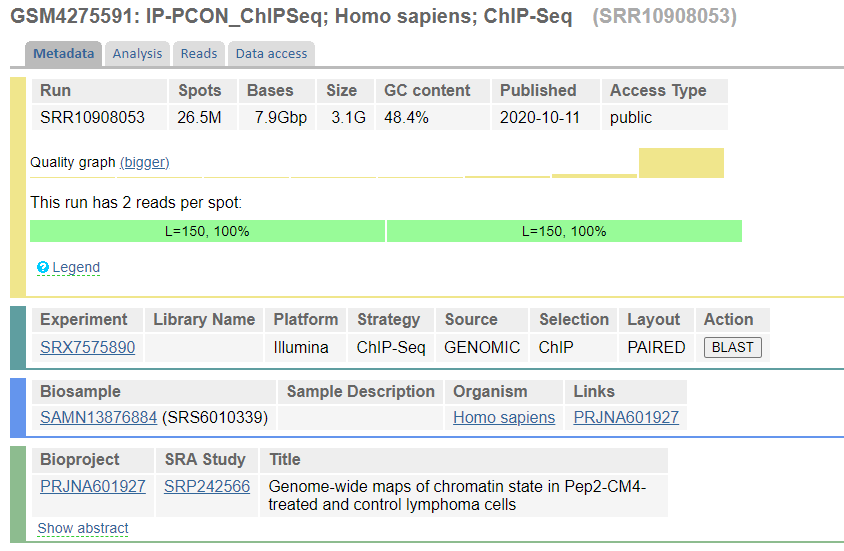

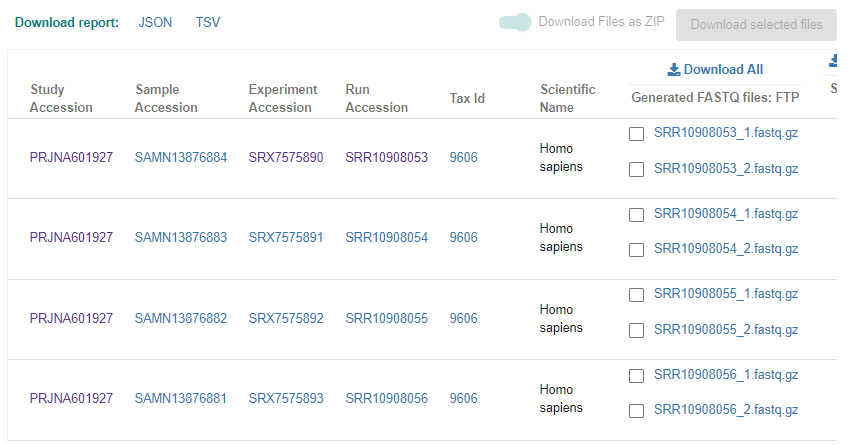

In [1]:
wget ftp.sra.ebi.ac.uk/vol1/fastq/SRR109/053/SRR10908053/SRR10908053_1.fastq.gz #IP_PCON

--2021-12-06 21:39:00--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR109/053/SRR10908053/SRR10908053_1.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2143721550 (2.0G) [application/octet-stream]
Saving to: ‘SRR10908053_1.fastq.gz’

SRR10908053_1.fastq 100%[===================>]   2.00G  3.77MB/s    in 9m 14s  

2021-12-06 21:48:15 (3.69 MB/s) - ‘SRR10908053_1.fastq.gz’ saved [2143721550/2143721550]



In [3]:
wget ftp.sra.ebi.ac.uk/vol1/fastq/SRR109/054/SRR10908054/SRR10908054_1.fastq.gz #IP_PCM4

--2021-12-06 21:48:30--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR109/054/SRR10908054/SRR10908054_1.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2118606143 (2.0G) [application/octet-stream]
Saving to: ‘SRR10908054_1.fastq.gz’

SRR10908054_1.fastq 100%[===================>]   1.97G  2.33MB/s    in 19m 55s 

2021-12-06 22:08:26 (1.69 MB/s) - ‘SRR10908054_1.fastq.gz’ saved [2118606143/2118606143]



In [4]:
wget ftp.sra.ebi.ac.uk/vol1/fastq/SRR109/055/SRR10908055/SRR10908055_1.fastq.gz #INPUT_PCON

--2021-12-06 22:13:32--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR109/055/SRR10908055/SRR10908055_1.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2032053096 (1.9G) [application/octet-stream]
Saving to: ‘SRR10908055_1.fastq.gz’

SRR10908055_1.fastq 100%[===================>]   1.89G  4.34MB/s    in 7m 54s  

2021-12-06 22:21:26 (4.09 MB/s) - ‘SRR10908055_1.fastq.gz’ saved [2032053096/2032053096]



In [5]:
wget ftp.sra.ebi.ac.uk/vol1/fastq/SRR109/056/SRR10908056/SRR10908056_1.fastq.gz #INPUT_PCM4

--2021-12-06 22:21:58--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR109/056/SRR10908056/SRR10908056_1.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1987642775 (1.9G) [application/octet-stream]
Saving to: ‘SRR10908056_1.fastq.gz’

SRR10908056_1.fastq 100%[===================>]   1.85G  3.75MB/s    in 13m 27s 

2021-12-06 22:35:25 (2.35 MB/s) - ‘SRR10908056_1.fastq.gz’ saved [1987642775/1987642775]



Unzip files:

In [6]:
gunzip SRR10908053_1.fastq.gz
gunzip SRR10908054_1.fastq.gz
gunzip SRR10908055_1.fastq.gz
gunzip SRR10908056_1.fastq.gz

Rename the files:

In [7]:
mv SRR10908053_1.fastq IP_PCON.fastq
mv SRR10908054_1.fastq IP_PCM4.fastq
mv SRR10908055_1.fastq INPUT_PCON.fastq
mv SRR10908056_1.fastq INPUT_PCM4.fastq

## 3. Quality Check
For both files, there is a good quality of the data.

In [8]:
fastqc IP_PCON.fastq
fastqc IP_PCM4.fastq

Started analysis of IP_PCON.fastq
Approx 5% complete for IP_PCON.fastq
Approx 10% complete for IP_PCON.fastq
Approx 15% complete for IP_PCON.fastq
Approx 20% complete for IP_PCON.fastq
Approx 25% complete for IP_PCON.fastq
Approx 30% complete for IP_PCON.fastq
Approx 35% complete for IP_PCON.fastq
Approx 40% complete for IP_PCON.fastq
Approx 45% complete for IP_PCON.fastq
Approx 50% complete for IP_PCON.fastq
Approx 55% complete for IP_PCON.fastq
Approx 60% complete for IP_PCON.fastq
Approx 65% complete for IP_PCON.fastq
Approx 70% complete for IP_PCON.fastq
Approx 75% complete for IP_PCON.fastq
Approx 80% complete for IP_PCON.fastq
Approx 85% complete for IP_PCON.fastq
Approx 90% complete for IP_PCON.fastq
Approx 95% complete for IP_PCON.fastq
Analysis complete for IP_PCON.fastq
Started analysis of IP_PCM4.fastq
Approx 5% complete for IP_PCM4.fastq
Approx 10% complete for IP_PCM4.fastq
Approx 15% complete for IP_PCM4.fastq
Approx 20% complete for IP_PCM4.fastq
Approx 25% complete for 

In [9]:
ls -lt | head

total 40264956
-rw-r--r-- 1 r0627946 domain users     670201 Dec  6 22:45 IP_PCM4_fastqc.html
-rw-r--r-- 1 r0627946 domain users     395857 Dec  6 22:45 IP_PCM4_fastqc.zip
-rw-r--r-- 1 r0627946 domain users     228665 Dec  6 22:44 Untitled.ipynb
-rw-r--r-- 1 r0627946 domain users     672112 Dec  6 22:43 IP_PCON_fastqc.html
-rw-r--r-- 1 r0627946 domain users     401280 Dec  6 22:43 IP_PCON_fastqc.zip
-rw-r--r-- 1 r0627946 domain users 6714081280 Dec  6 12:23 IP_PCON.sam
-rw-r--r-- 1 r0627946 domain users 8378261381 Oct 12  2020 INPUT_PCM4.fastq
-rw-r--r-- 1 r0627946 domain users 8751729162 Oct 12  2020 IP_PCM4.fastq
-rw-r--r-- 1 r0627946 domain users 8485271687 Oct 12  2020 INPUT_PCON.fastq


#### 1) Quality IP_PCON

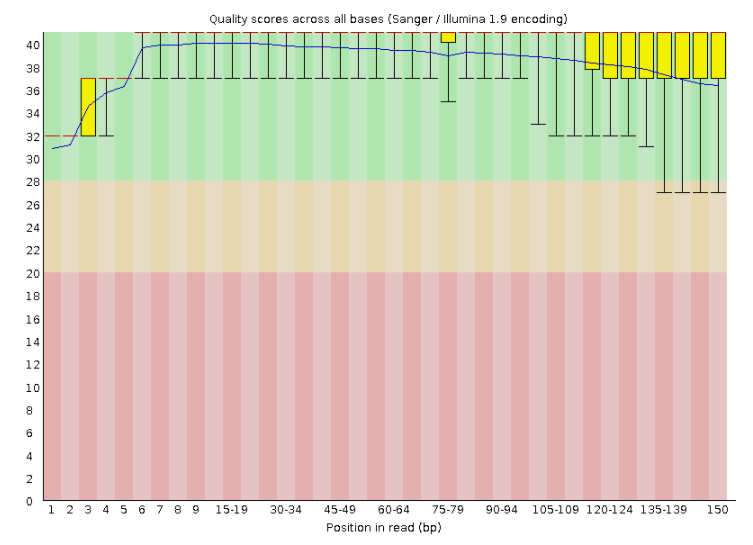

#### 2) Quality IP_PCM4

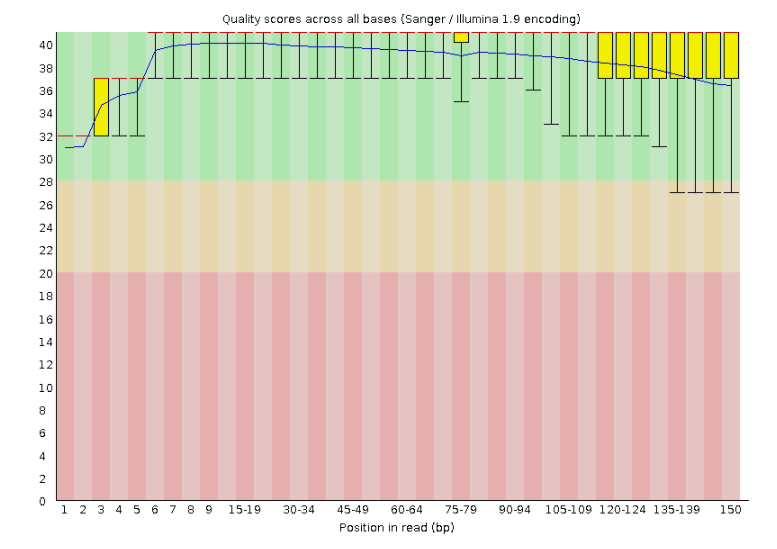

## 4. Alignment of PCON and PCM4 reads
Bowtie2 is used to match the ChIP-seq readings to a reference genome. Bowtie2 is used to match the ChIP-seq readings to a reference genome. The entire human genome, hg19, is used as the reference genome. The whole genome bowtie index can be found here: /mnt/storage/data/resources/bowtie2/hg19

#### 4.1. Alignment of IP files
1) IP_PCON:

In [10]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 IP_PCON.fastq -S IP_PCON.sam

26474220 reads; of these:
  26474220 (100.00%) were unpaired; of these:
    2661660 (10.05%) aligned 0 times
    20003589 (75.56%) aligned exactly 1 time
    3808971 (14.39%) aligned >1 times
89.95% overall alignment rate


2) IP_PCM4:

In [11]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 IP_PCM4.fastq -S IP_PCM4.sam

26035464 reads; of these:
  26035464 (100.00%) were unpaired; of these:
    2654918 (10.20%) aligned 0 times
    19604050 (75.30%) aligned exactly 1 time
    3776496 (14.51%) aligned >1 times
89.80% overall alignment rate


First lines of the Sam files: 

In [14]:
head -500 IP_PCON.sam | tail -5

SRR10908053.410	16	chr11	34375302	42	150M	*	0	0	CAAATGCATGTGCCCTTCCTGTATAATTAGCAGGCATATCAACCATAAATTTATAATTTAAACGGAAGACCAGCAGGACAAGAATTCTAACCAGCACTCTCCTTCCCATACGCAGTCATTCCCCAGTTGGTCTTCAGCTGTGTAAACCAT	JJJFA-7JAJJ<A-7-F-JAJFJJJJJJJFJJJF7-FJ-JFAA-JA7J-JJJAFJJA<FJA7--AFJJFFJJAFFFFA<JA-JJJJJJJJJJJJJJJJJJJFJAJJ<JJJJJF--FJJJJJJJJJJJJJJJJJJF-JJJJJJJJJFFFAA	AS:i:-17	XN:i:0	XM:i:5	XO:i:0	XG:i:0	NM:i:5	MD:Z:15A1G25A18G85G1	YT:Z:UU
SRR10908053.411	0	chr18	64507337	6	150M	*	0	0	AACCCCGTCTCTACTAAAAATACAAAAAATTAGCCGGGTGAGGTGGCGGGCGCCTGTAGTCCCTGCTATTCGGGAGGCTGAGGCAGGAGAATGGCGTGAACGCCAGGGGGCGGAGCCTGCAGTGAGCCGAGATCGTACCACTGCACTCCA	AAFFFJJJJJJJJFA<FJ<FFJJJJF<JJJJJFAJJFJFFA7AFJFJJF7-7AJJ-FFFJ7JF-AJ-J-FJJ7F7<FAJF7JJJJJAFJJJFF-<FAJJJJ--7-A7A-AJAFFJ-FJF-<FFFJ-FFFJJJ7----7F<FFJJJJAAJ-	AS:i:-27	XS:i:-31	XN:i:0	XM:i:7	XO:i:0	XG:i:0	NM:i:7	MD:Z:63A4C25T6C7C25C12T1	YT:Z:UU
SRR10908053.412	0	chr4	110502375	7	150M	*	0	0	ATAATGCCGCATAACTACAACTATCTGTTCTTTGATAAACCTGACAAAAACAAGCAATGGGGAAAGGATTCCCTATTTAATAAATGGTGCTGGGAAA

In [15]:
head -500 IP_PCM4.sam | tail -5

SRR10908054.410	4	*	0	0	*	*	0	0	GAAACACGGAGCCAAACTTTGATATGTCAGTGGAGACTGCCTTAGGAGGGAATATCCTCGCTATCTTCCAAATAGGTTAAGATCTGGAGGCATCGTGAGGTGTCCCAAGTTACTGAGGCCATTGAGTTCCTTATATCAAAATAAGTGTCA	AAFFAJJ-A<FJ--<<JF-<AFJJJ-A<<--F-F<--FF-F<F7-FJJJ--<<7F--<FJ-F7A-J-A--<-7--77-<A-7FF-777<FAF---AJFJFF7-77--A-FA-FF<-JJ-A77-<<AA-77FFA----7AAFJ7A-<<JAJ	YT:Z:UU
SRR10908054.411	16	chr14	38085656	24	150M	*	0	0	TTTGTATACTCTAGAGCATTCTTAGGTCAATAAAAGAACTTACTCCAAACTTTATATGTTGCTGTGAGGAATTGATCTGTAAAGATGCATCTGTGAATTAGCCAGACATGGTGGCGGGTCACTGTAGTCCCAGCTACTCAGGAGGCTGAG	-7--<-AAA7A7------F<JJJF7FA-FJA<JF7-FA-AA77-A-7-AF<FFJFJJJJJA<--JFJJJJJJFJF7<F7JJJJFJJAJJFJFJJJJFF-F-<AJJFJJAF-JF-FJJJF<-F<F-JJJFFJJJJAJ<AJJJJJJJFFFAA	AS:i:-33	XN:i:0	XM:i:10	XO:i:0	XG:i:0	NM:i:10	MD:Z:5T6G0A2A18A2A2T5G57G14T29	YT:Z:UU
SRR10908054.412	0	chr7	1760538	24	150M	*	0	0	ACACCCATCCTGCCTGGGCCCAGGTCCCAGTTGTGTACCTTACCAACGTGTCCCTTGCACTTTCTCTGTGCCTCAGTTTCCTCTTCTGGTAAATGAGAATGTTTAGAAGACTTTCTACGTCATGGTATTTCTTGGTGTTTAATAACATTT	AAAF<JJJJJJFJF-FJJFJ777FJJF

Convert sam files into binary bam files:

In [16]:
samtools view -S -b IP_PCON.sam > IP_PCON.bam

In [17]:
samtools view -S -b IP_PCM4.sam > IP_PCM4.bam

Total amount of reads in the bam files: 

In [18]:
samtools view -c IP_PCON.bam

26474220


In [19]:
samtools view -c IP_PCM4.bam

26035464


Total amount of mapped reads in the bam files:

In [20]:
samtools view -c -F 260 IP_PCON.bam

23812560


In [21]:
samtools view -c -F 260 IP_PCM4.bam

23380546


Generate files that are able to use in IGV:

1) Bam files: 

In [22]:
samtools sort -O bam -o IP_PCON.sorted.bam IP_PCON.bam

[bam_sort_core] merging from 11 files and 1 in-memory blocks...


In [23]:
samtools sort -O bam -o IP_PCM4.sorted.bam IP_PCM4.bam

[bam_sort_core] merging from 11 files and 1 in-memory blocks...


2) Index files

In [24]:
samtools index IP_PCON.sorted.bam

In [25]:
samtools index IP_PCM4.sorted.bam

IGV:

Since the TRIB3 gene and the MYC gene are important genes, both will be looked at. Both genes show enrichtment in read peaks in the region where the gene is located. To check whether these peaks are higher, the control (input) files are also aligned and viewed in IVG.

The locations of the genes can be found on the ncbi website:
* TRIB3 gene: https://www.ncbi.nlm.nih.gov/gene/57761
* MYC gene: https://www.ncbi.nlm.nih.gov/gene/4609

1) TRIB3 gene: 

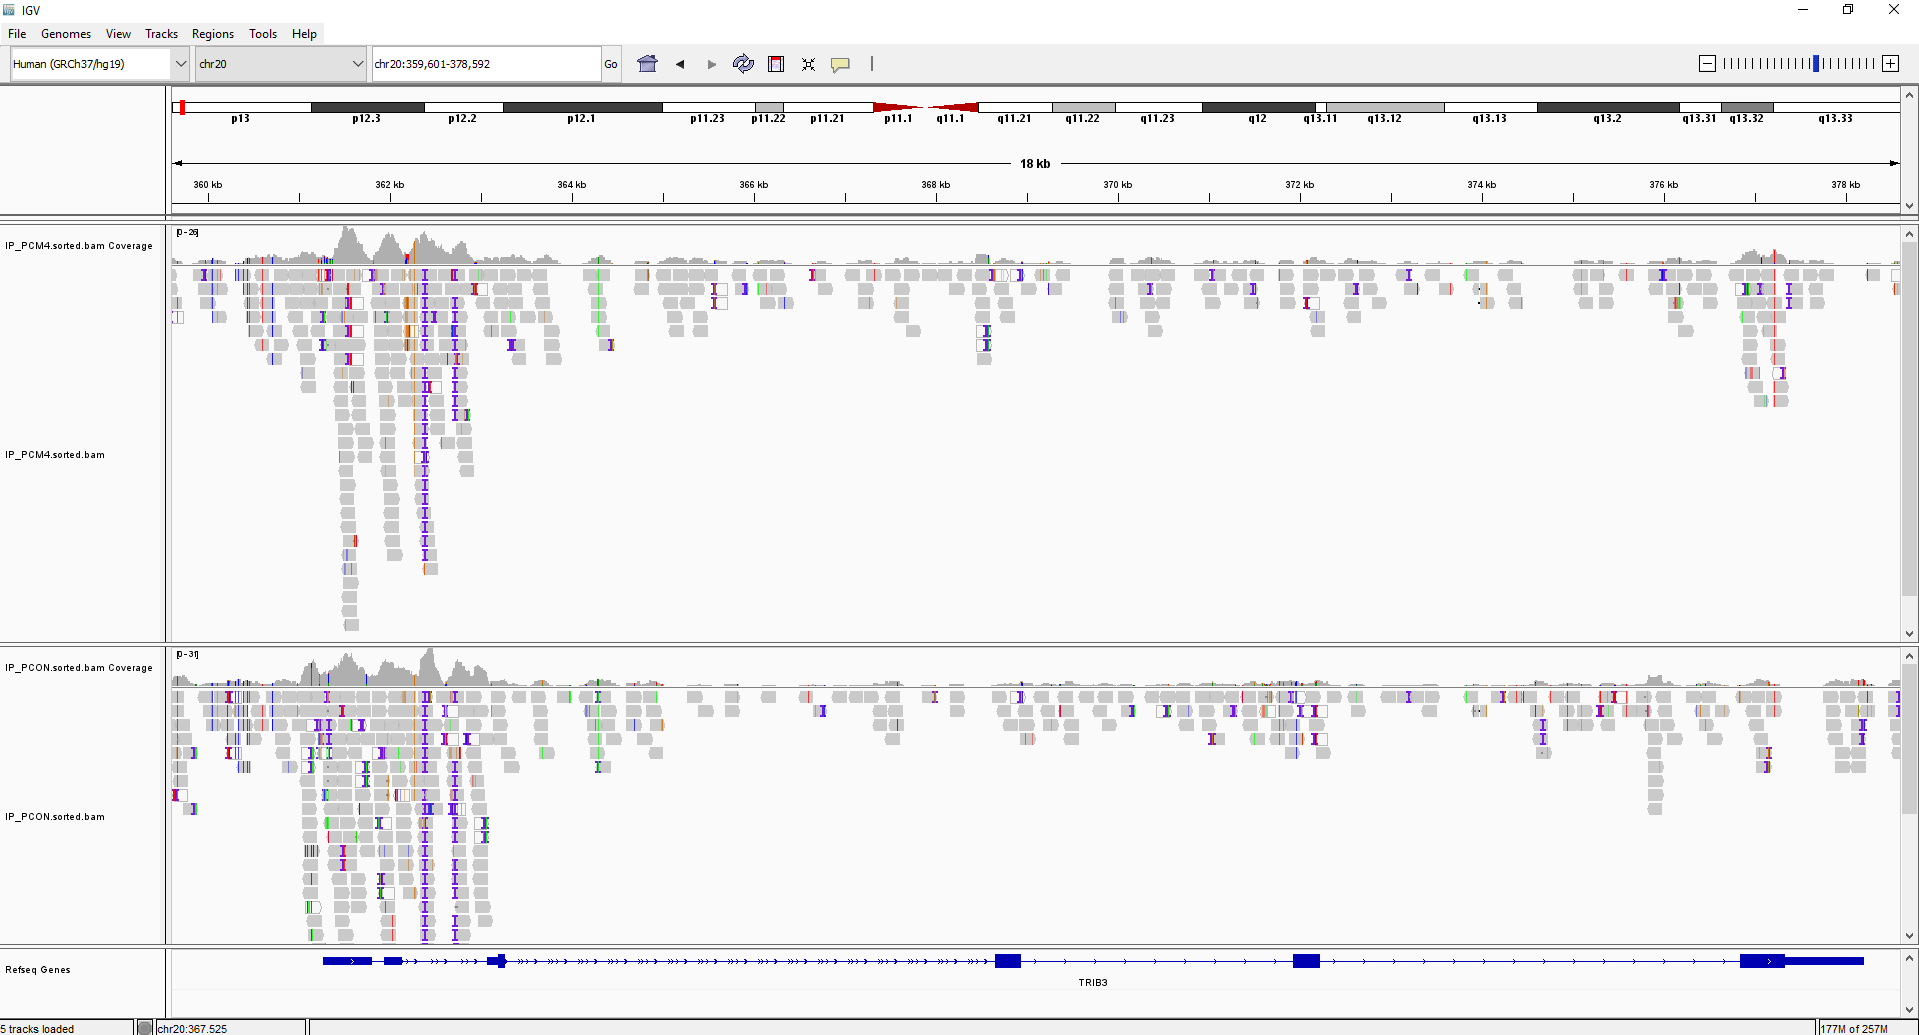

2) MYC gene: 

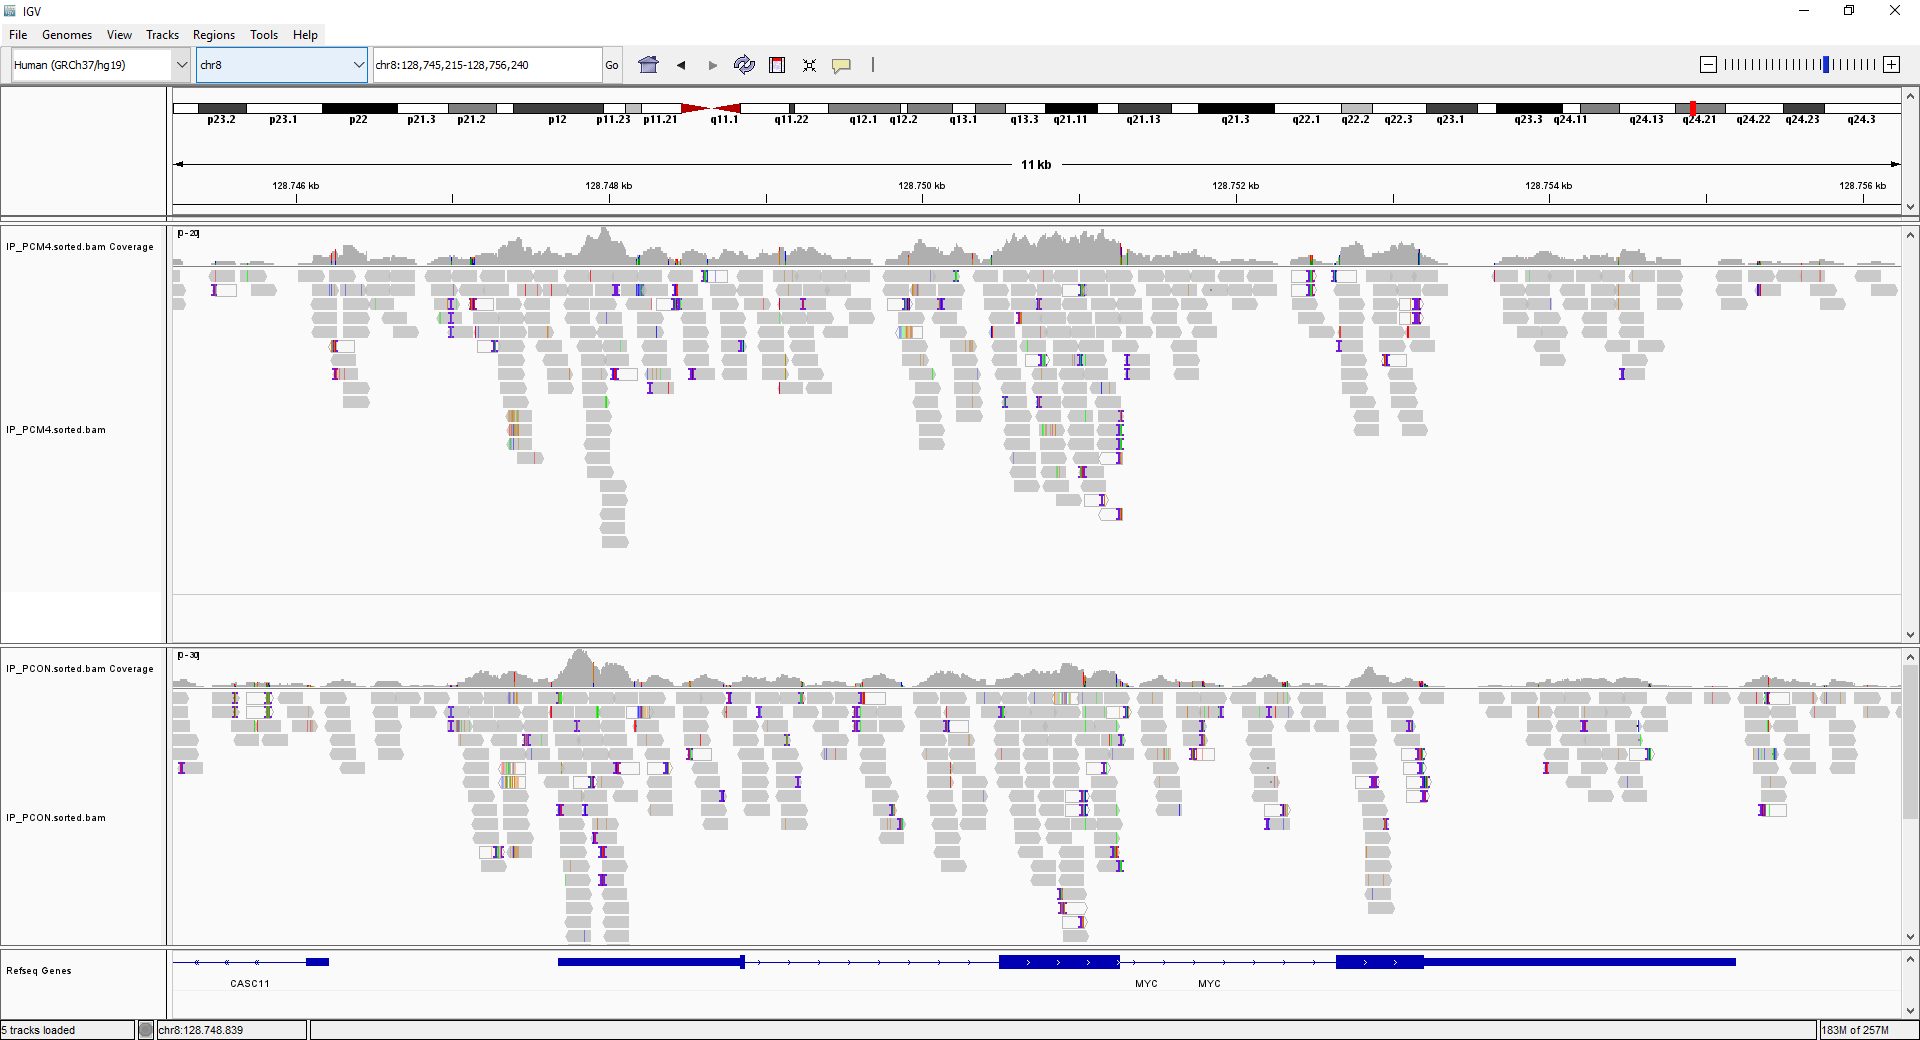

Compare with input (control) files

#### 4.2. Alignment op INPUT files ( = control files)

In [26]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 INPUT_PCON.fastq -S INPUT_PCON.sam

25244789 reads; of these:
  25244789 (100.00%) were unpaired; of these:
    2622780 (10.39%) aligned 0 times
    19300588 (76.45%) aligned exactly 1 time
    3321421 (13.16%) aligned >1 times
89.61% overall alignment rate


In [27]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 INPUT_PCM4.fastq -S INPUT_PCM4.sam

24927251 reads; of these:
  24927251 (100.00%) were unpaired; of these:
    2276391 (9.13%) aligned 0 times
    19408072 (77.86%) aligned exactly 1 time
    3242788 (13.01%) aligned >1 times
90.87% overall alignment rate


In [28]:
samtools view -S -b INPUT_PCON.sam > INPUT_PCON.bam
samtools view -S -b INPUT_PCM4.sam > INPUT_PCM4.bam

In [29]:
samtools view -c -F 260 INPUT_PCON.bam

22622009


In [30]:
samtools view -c -F 260 INPUT_PCM4.bam 

22650860


In [31]:
samtools sort -O bam -o INPUT_PCON.sorted.bam INPUT_PCON.bam
samtools sort -O bam -o INPUT_PCM4.sorted.bam INPUT_PCM4.bam

[bam_sort_core] merging from 11 files and 1 in-memory blocks...
[bam_sort_core] merging from 11 files and 1 in-memory blocks...


In [32]:
samtools index INPUT_PCON.sorted.bam
samtools index INPUT_PCM4.sorted.bam

IGV:

1) TRIB3 gene in IP_PCON file compared with the controle (INPUT_PCON) file:

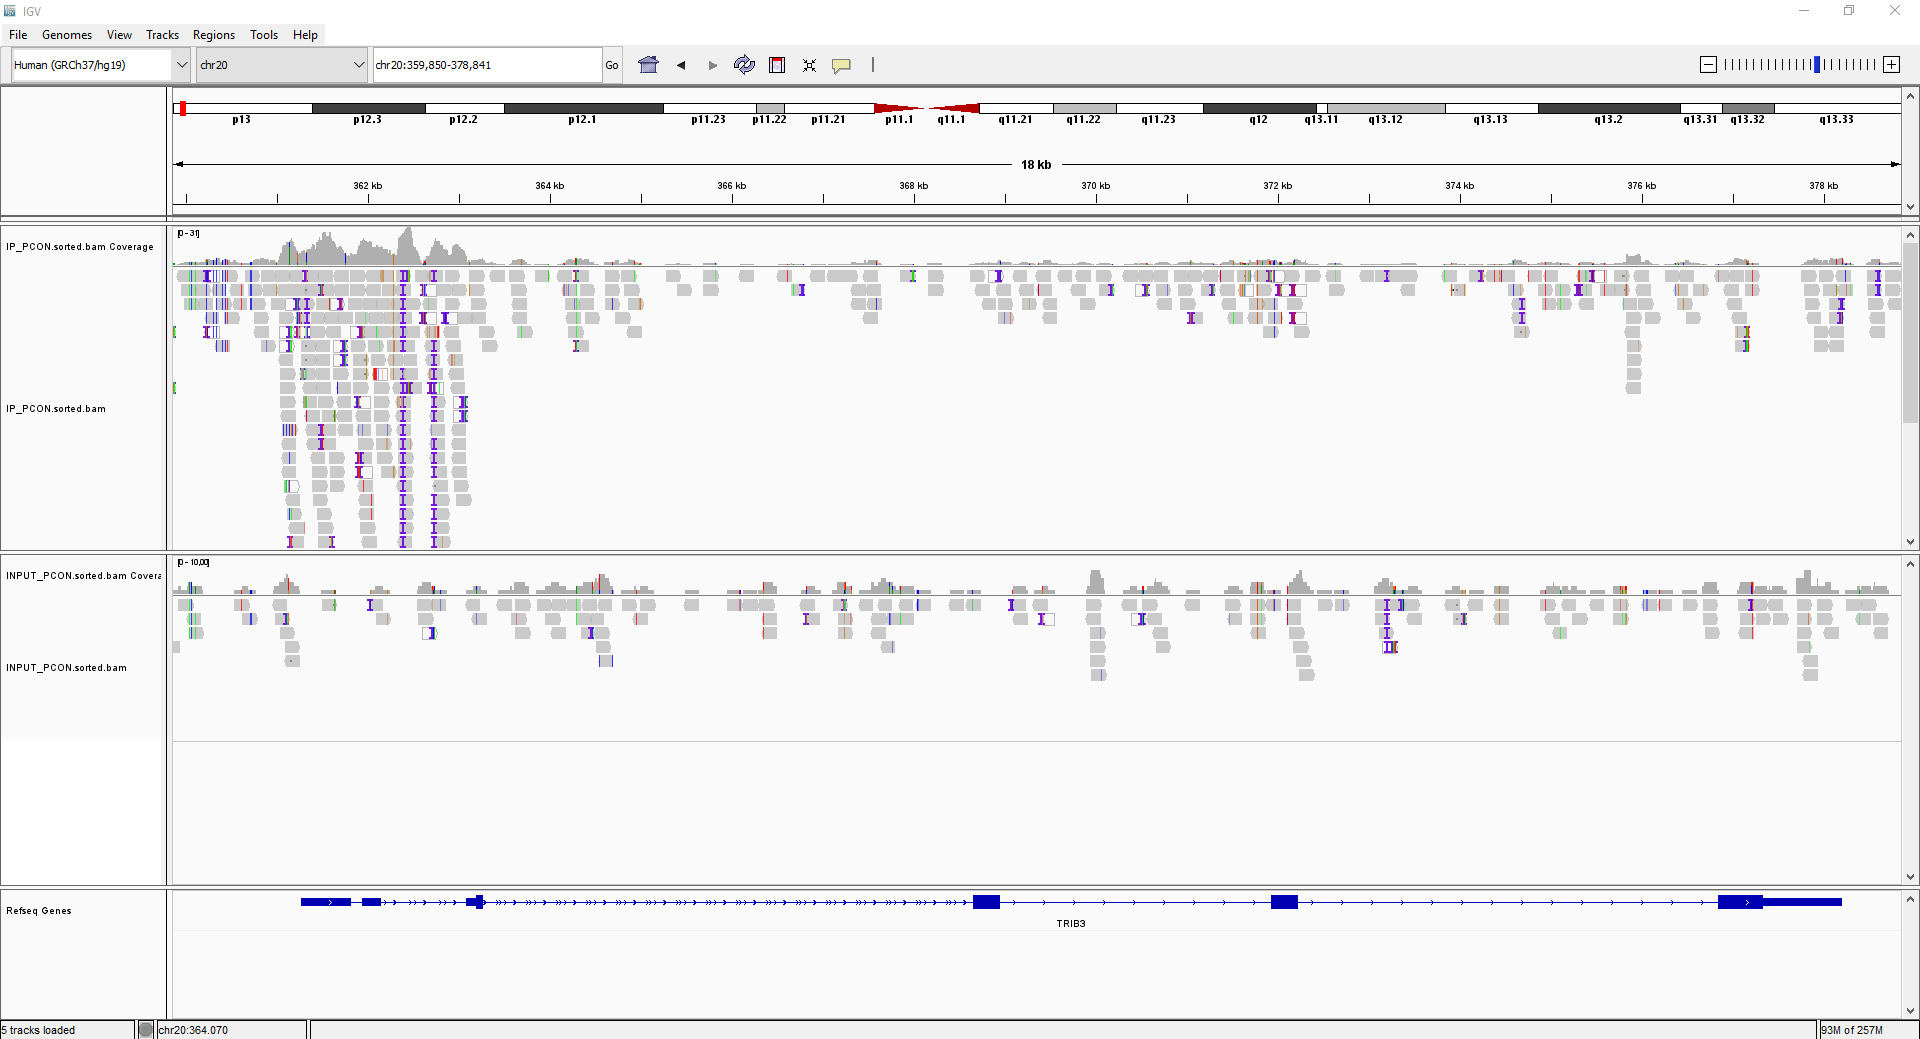

2) TRIB3 gene in IP_PCM4 file compared with the controle (INPUT_PCM4) file:

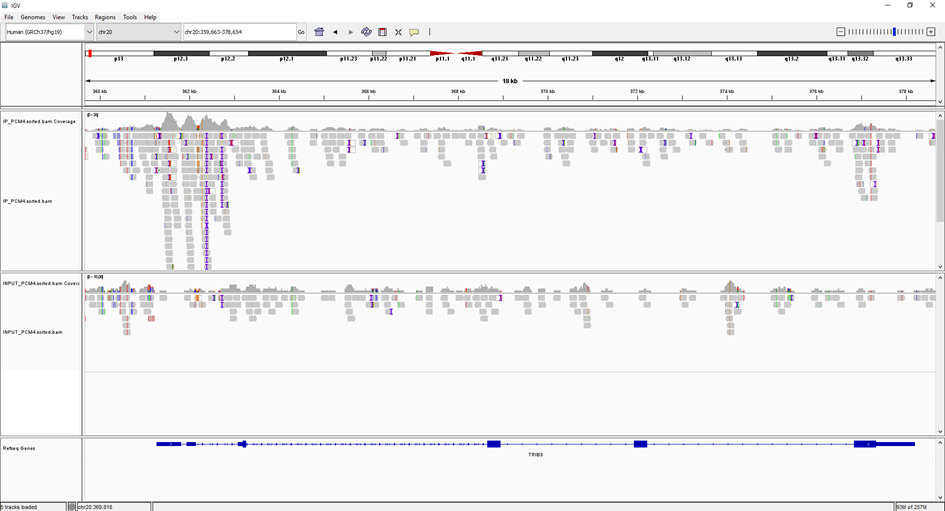

3) MYC gene in IP_PCON file compared with the controle (INPUT_PCON) file:

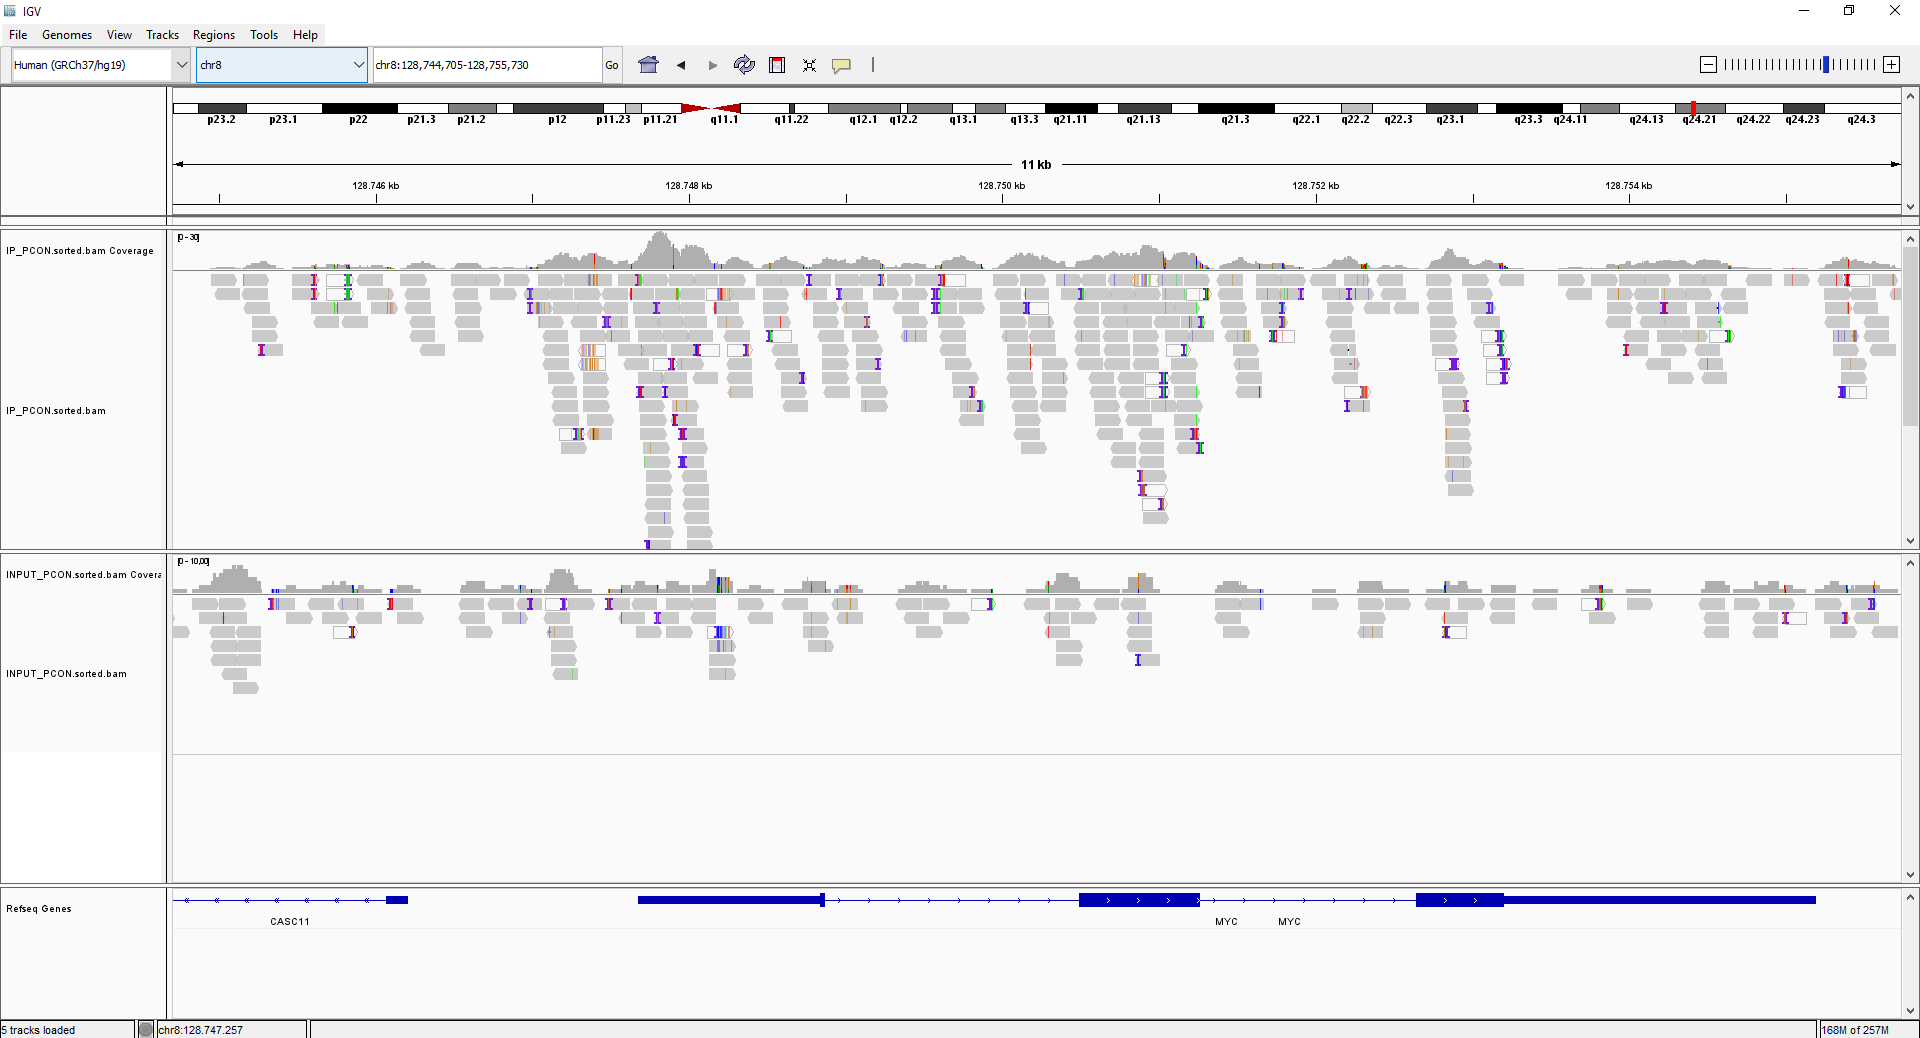

4) MYC gene in IP_PCM4 file compared with the controle (INPUT_PCM4) file:

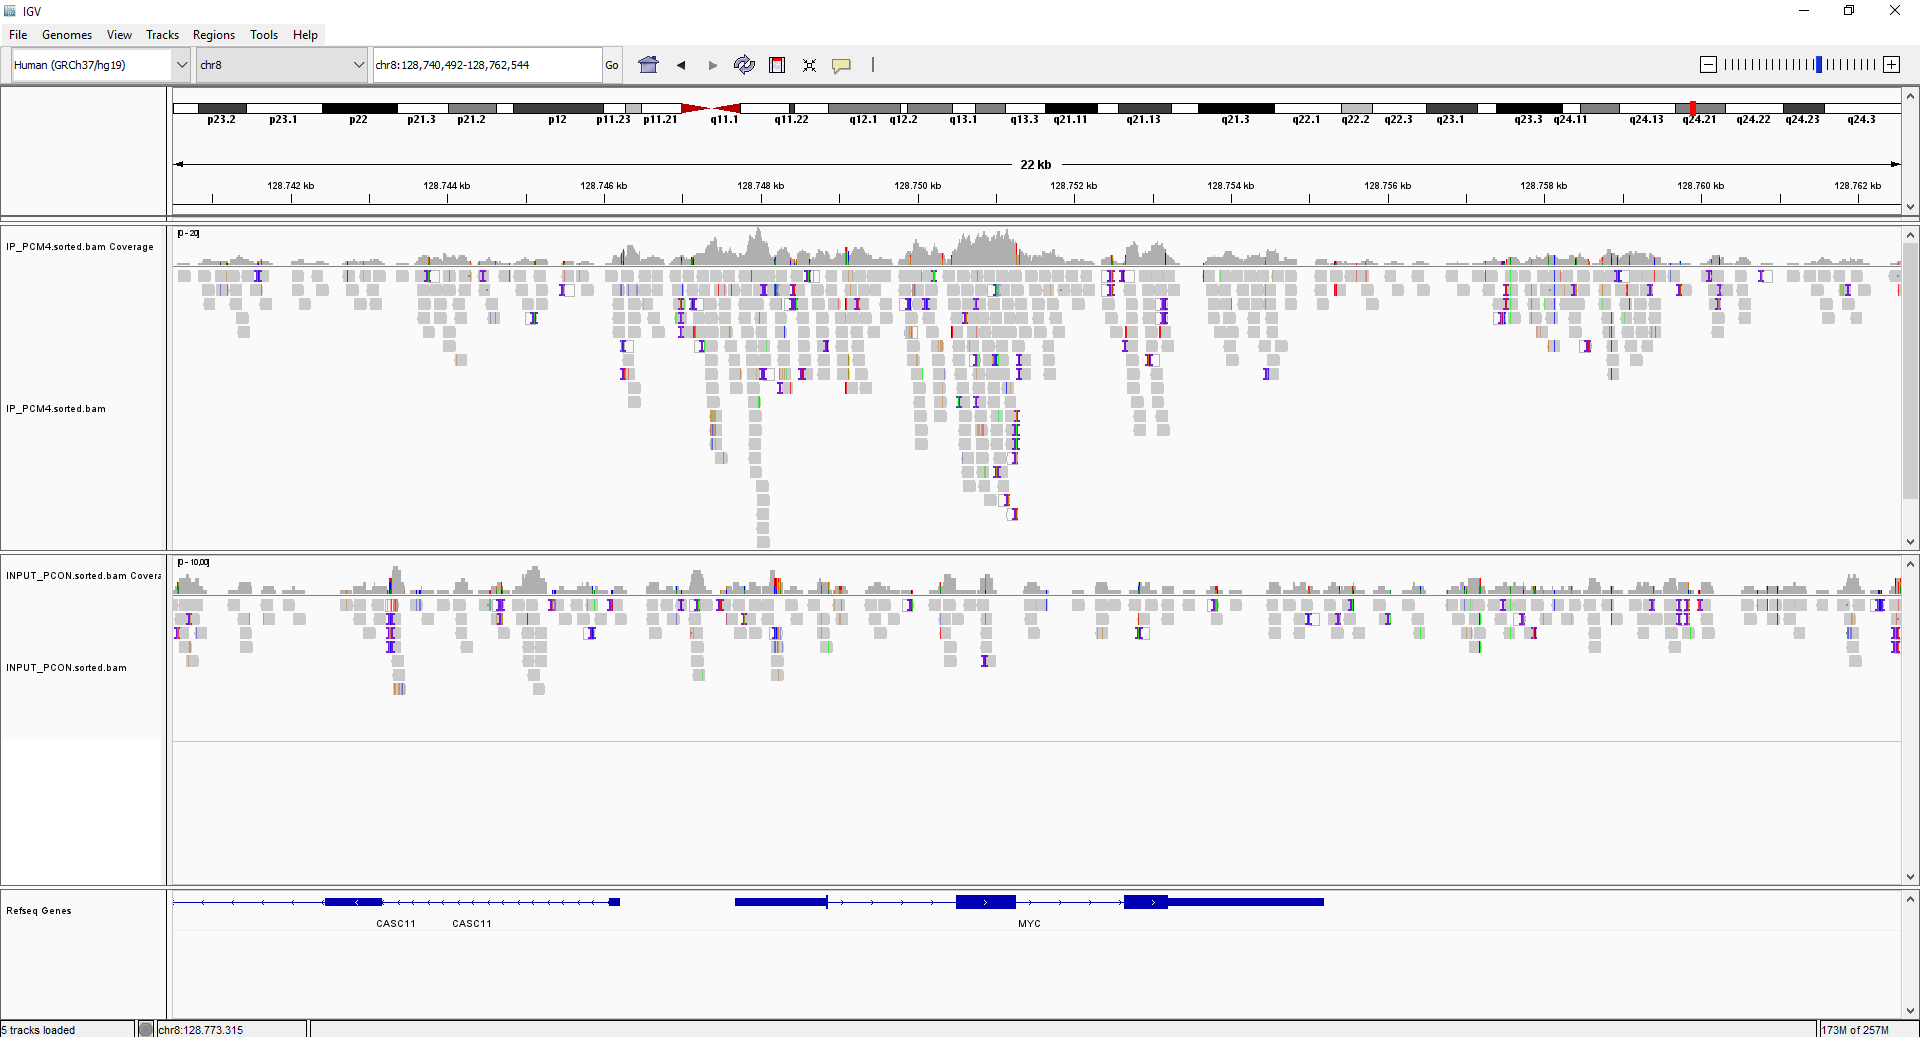

## 5. Genome-wide Coverage plots

Generate bigwig files:
In the next step bigwig files are created, for both PCON and PCM4. These files only include the coverage of the reads. 
* Effective genome size for hg19: --effectiveGenomeSize = 2864785220
* Website: https://deeptools.readthedocs.io/en/develop/content/feature/effectiveGenomeSize.html
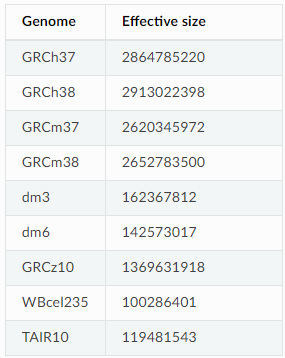

In [33]:
bamCoverage -b IP_PCON.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2864785220 -o IP_PCON_wholegenome.bw
bamCoverage -b IP_PCM4.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2864785220 -o IP_PCM4_wholegenome.bw

normalization: 1x (effective genome size 2864785220)
bamFilesList: ['IP_PCON.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000
normalization: 1x (effective genome size 2864785220)
bamFilesList: ['IP_PCM4.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFl

Genome-wide coverage plot: whole genome:
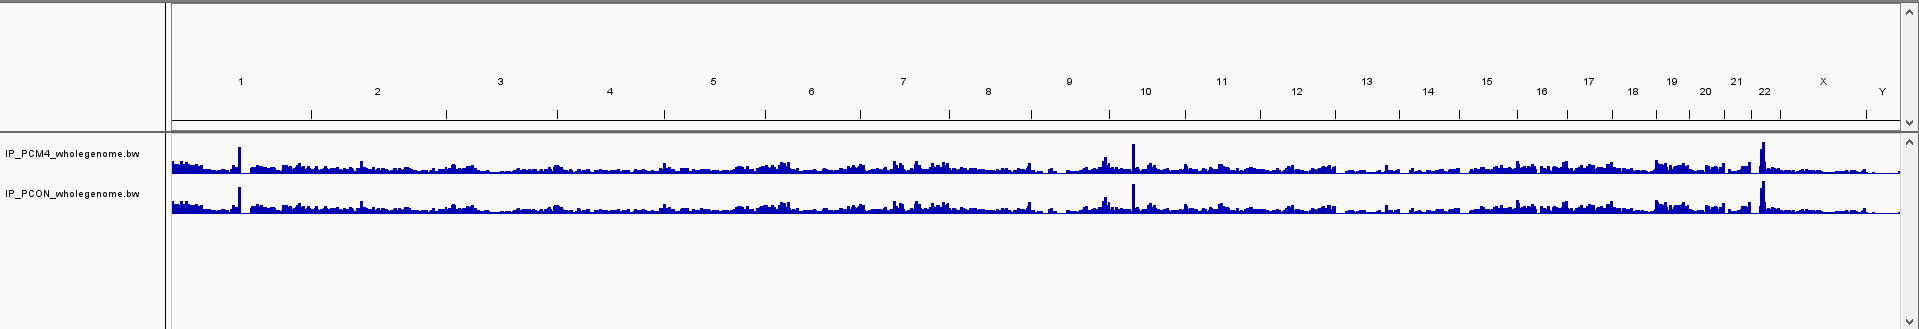

IGV PCON & PCM4: TRIB3

Chromosome 20:
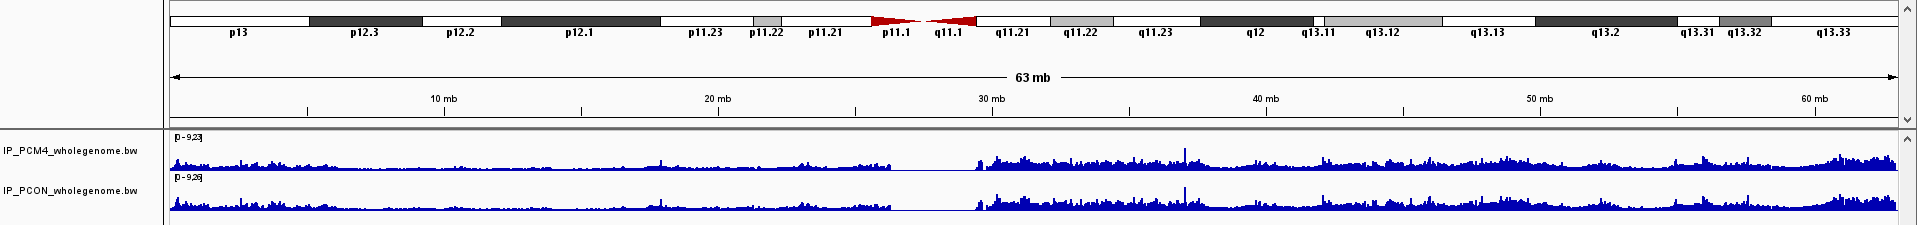

Zoom in on TRIB3 gene:
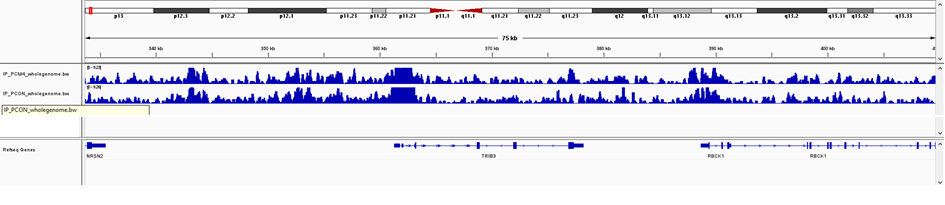

PCM4: (green bar)

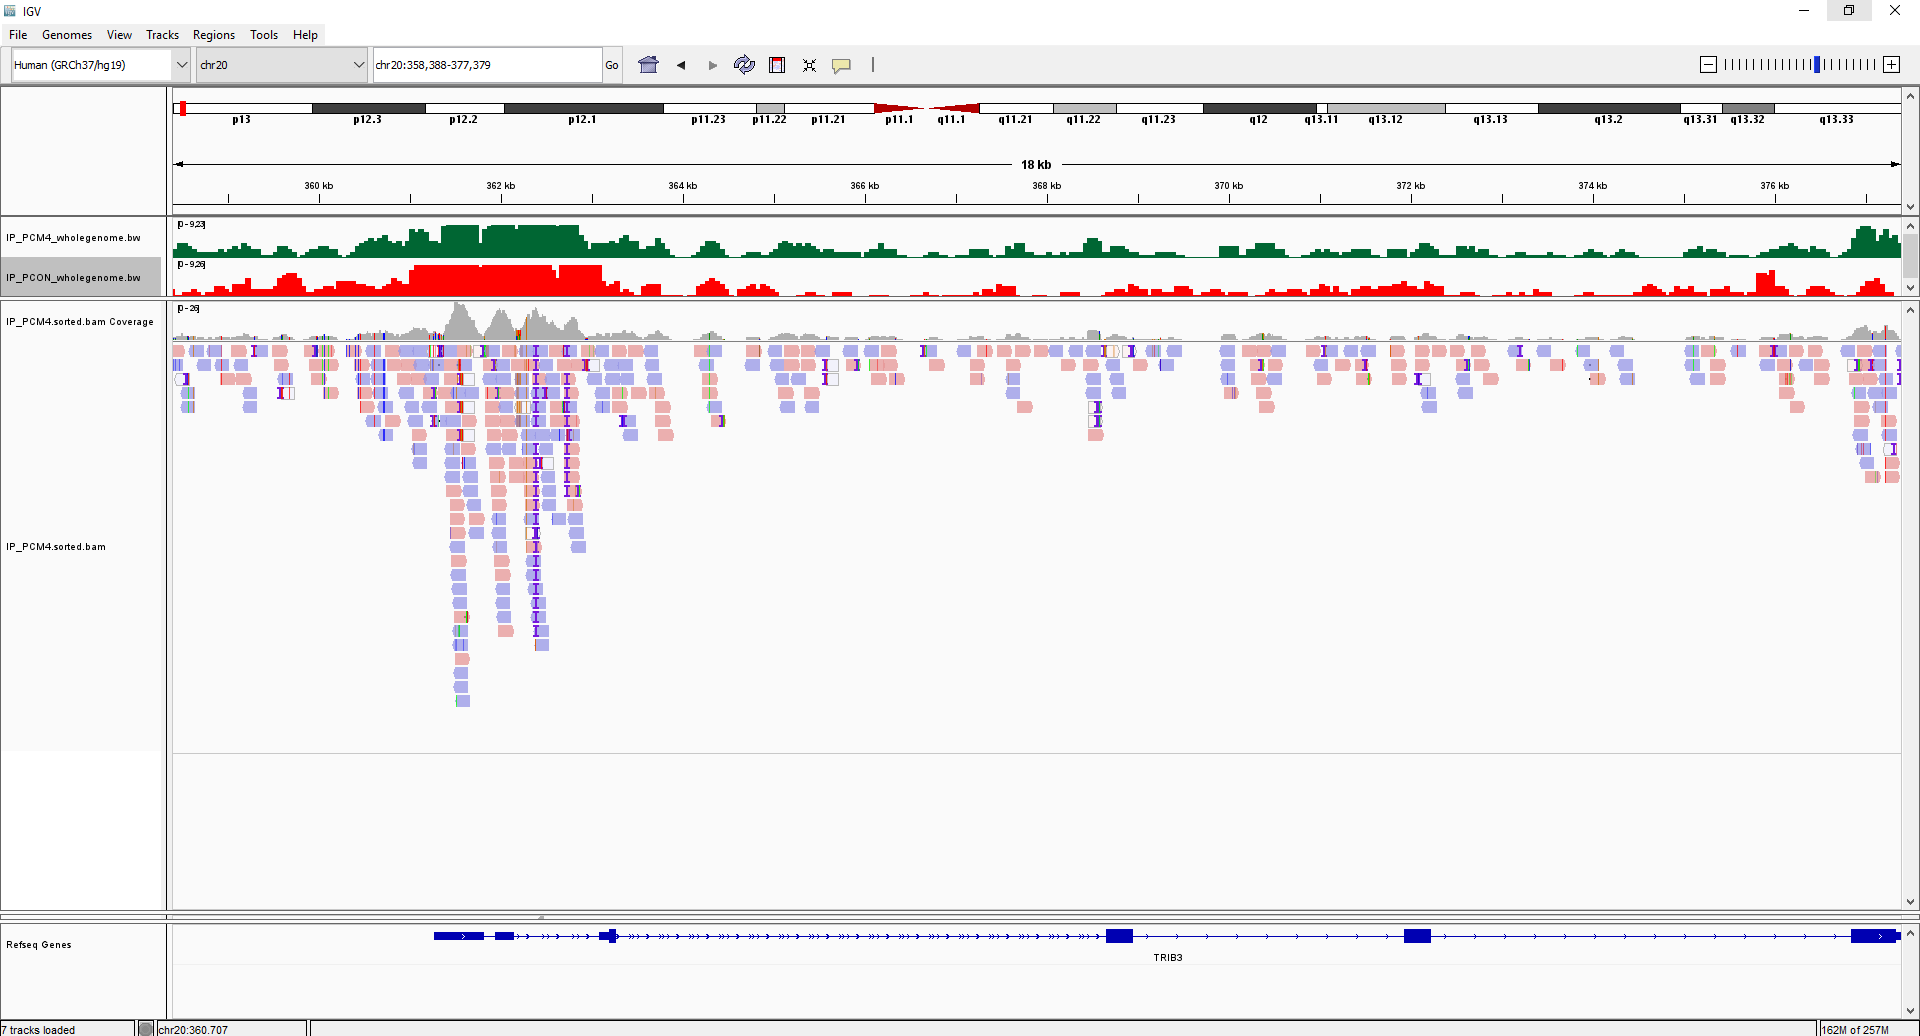

PCON: (red bar)

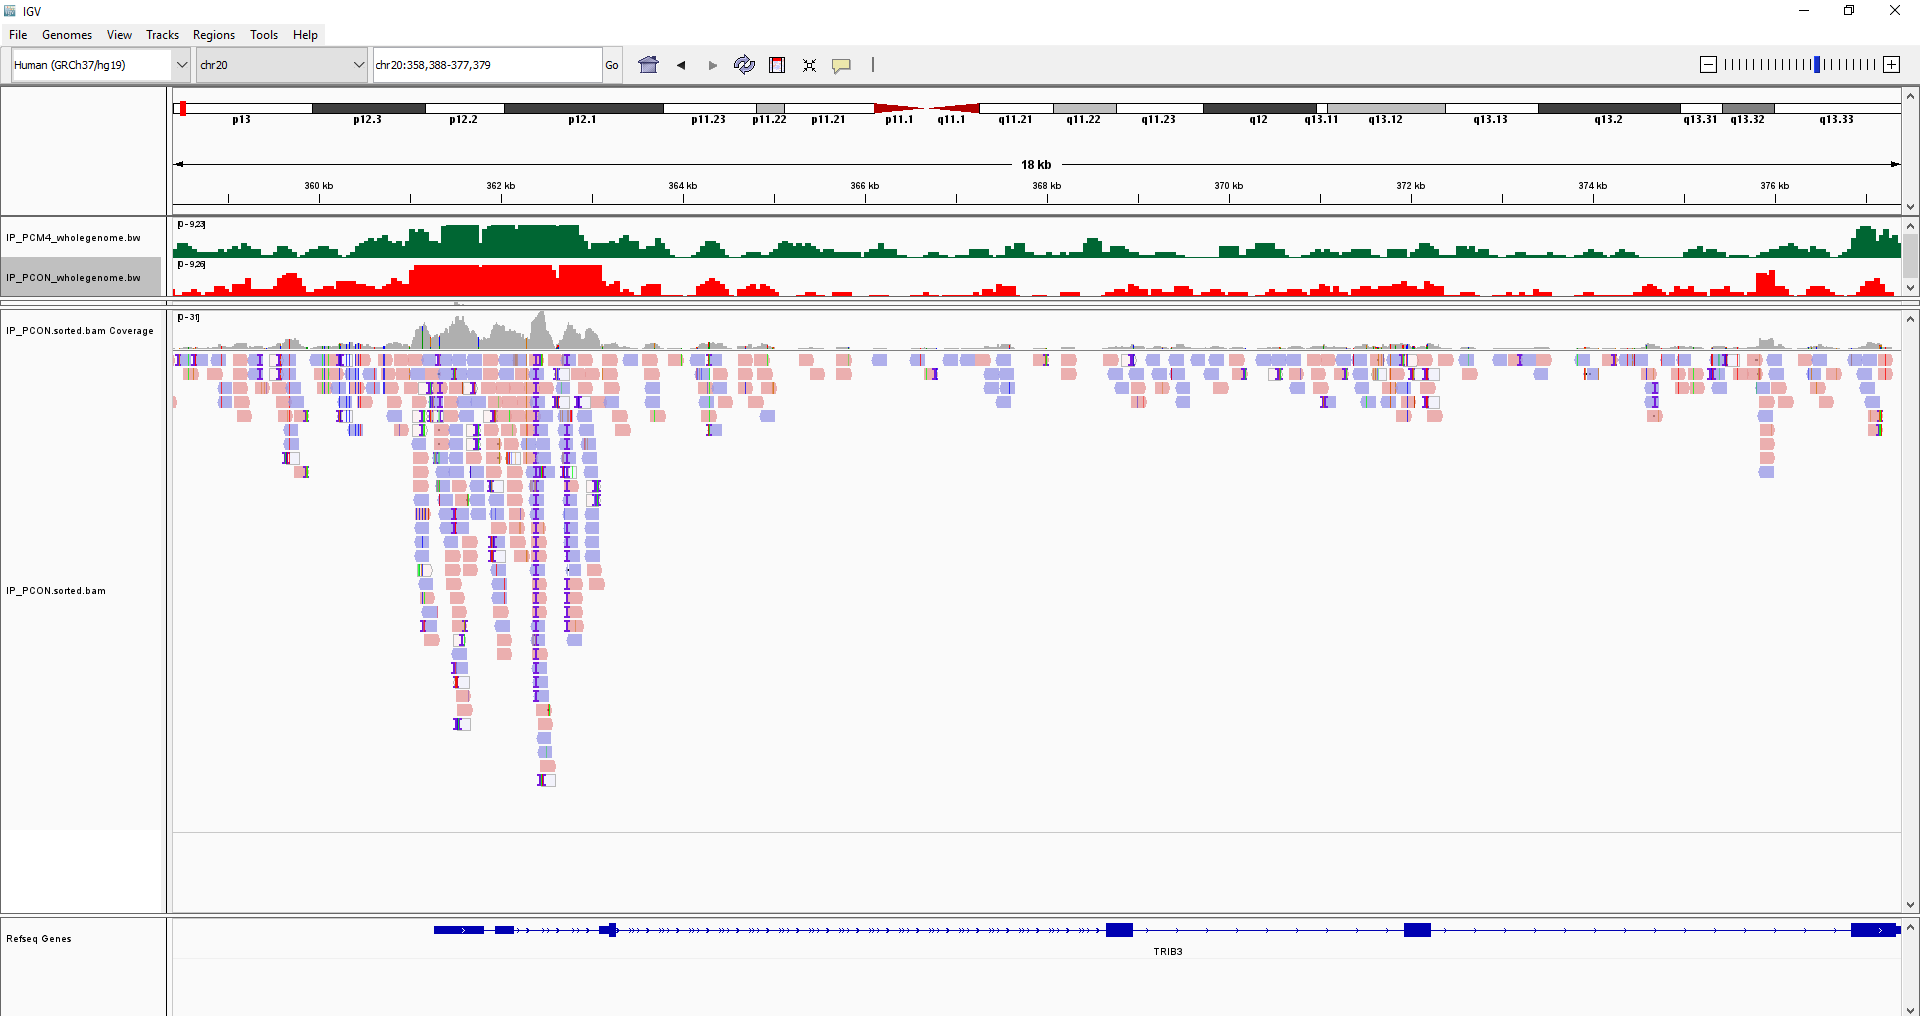

## 6. Genome-wide peak calling
In the next step, regions in a genome that are enriched with aligned reads are searched for. As in previous IVG images, these regions are visualized as peaks. The forward and back strands are colored blue and red.

#### 6.1. PCM4 peaks:

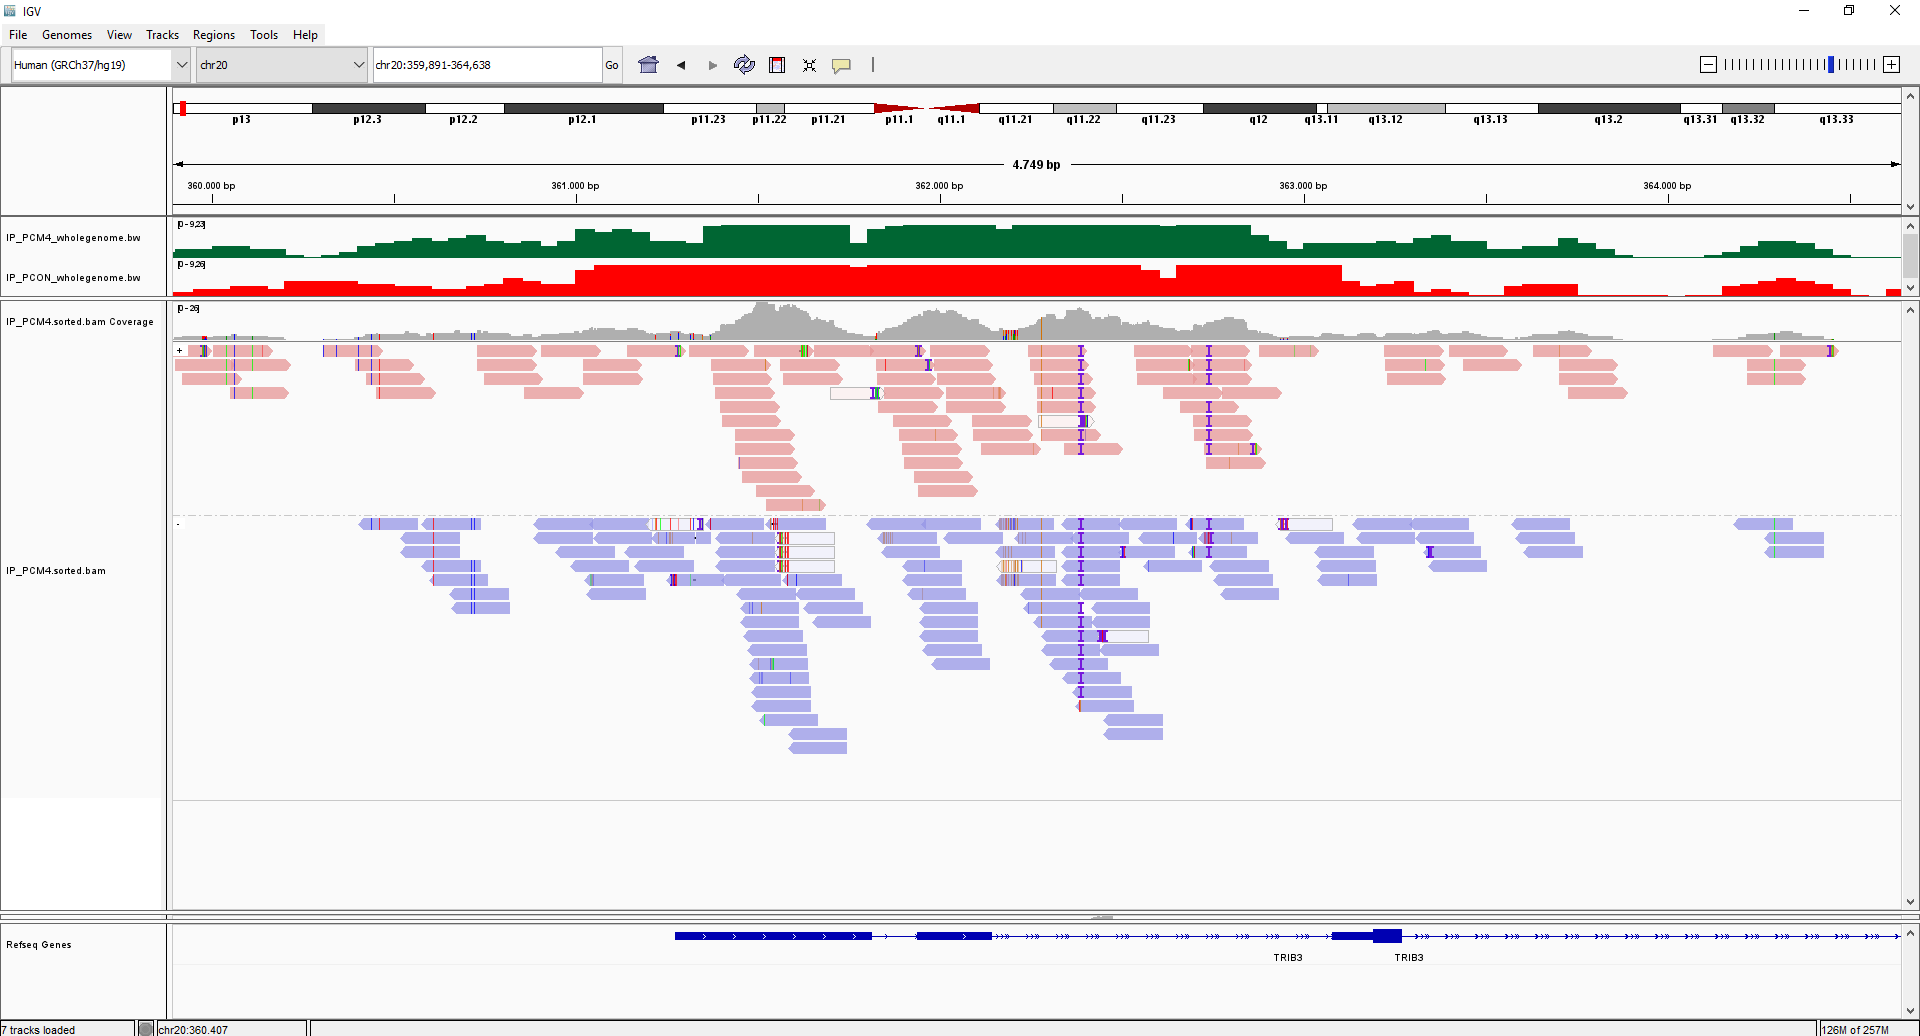

#### 6.2. PCON peaks:

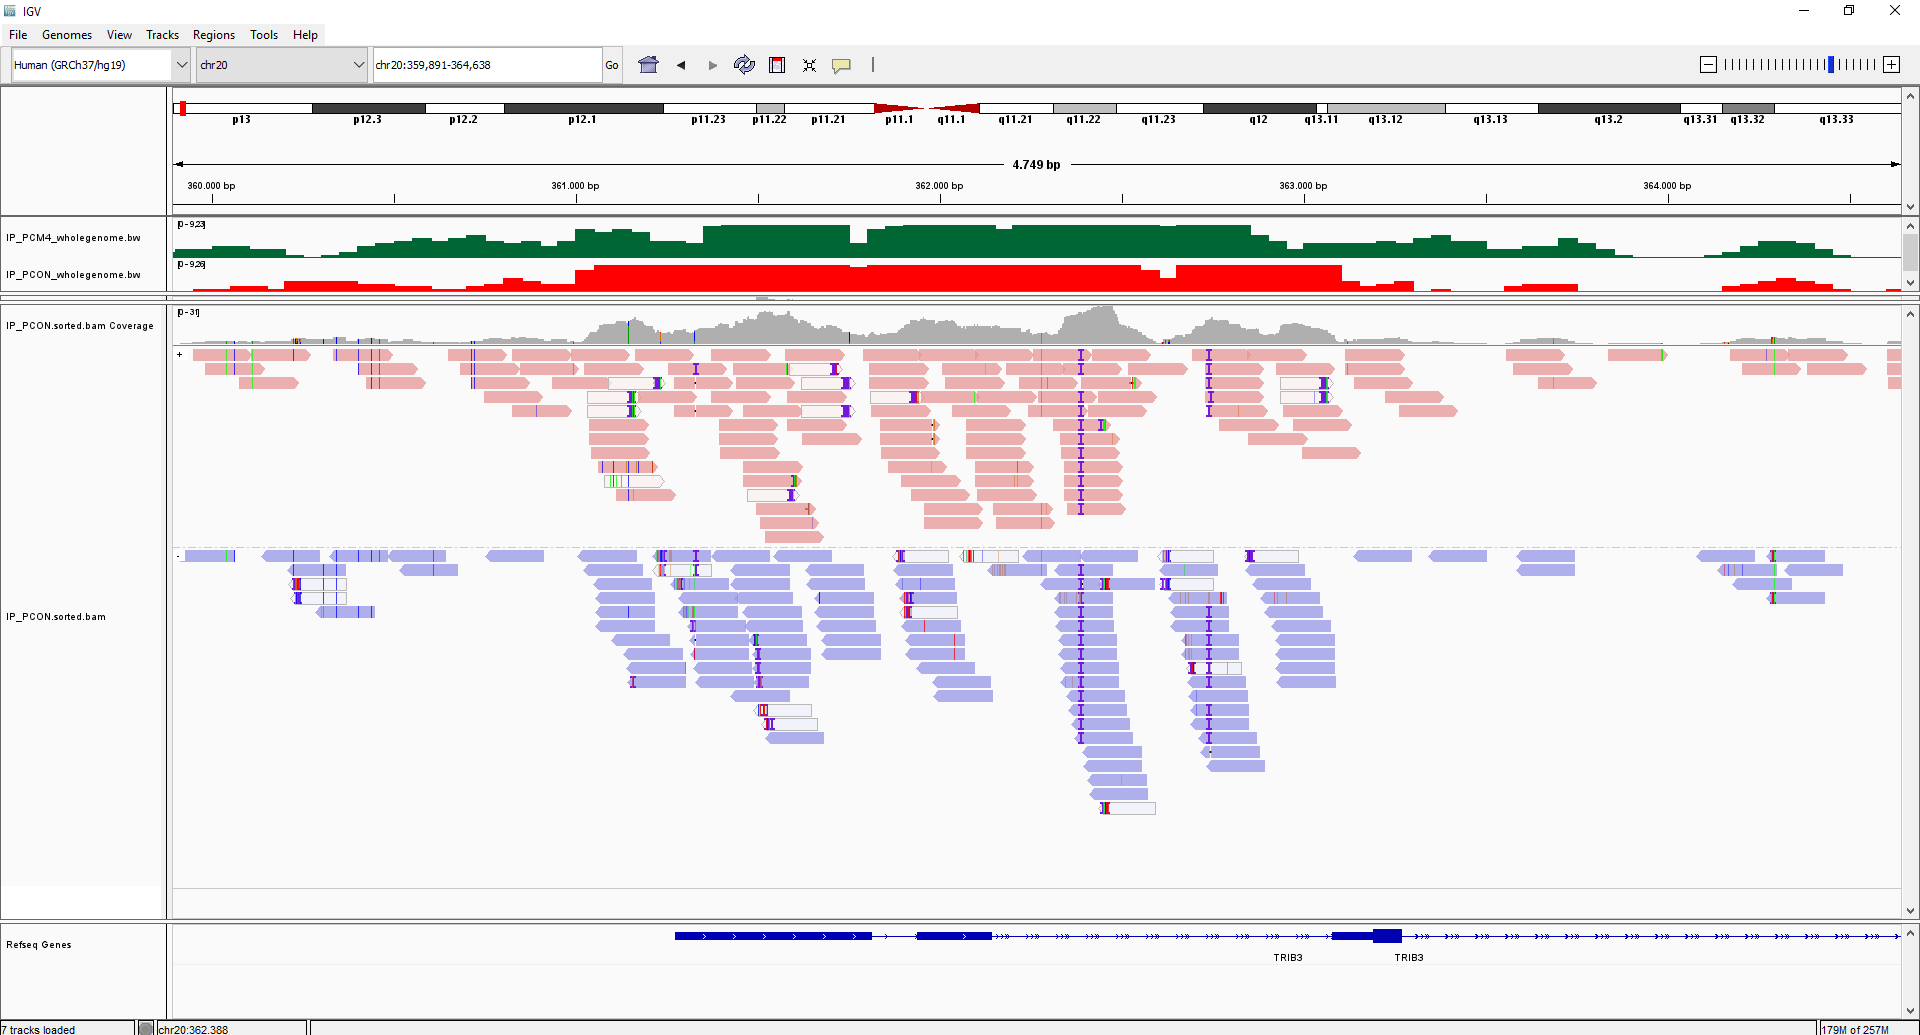

When zooming in on the peaks, we see that the red and blue strands are separated per peak.

#### 6.3. MACS2:
Extra information: https://hbctraining.github.io/Intro-to-ChIPseq/lessons/05_peak_calling_macs.html

* -t: IP data file: IP_PCM4.sorted.bam and IP_PCON.sorted.bam
* -c: INPUT data file (control file): INPUT_PCM4.sorted.bam and INPUT_PCON.sorted.bam
* -n: The prefix string for output files: PCM4 and PCON
* -g: mappable/effective genome size: hs = whole genome
* -q: minimum cut-off q-value for peak detection: default is 0.05

In [34]:
macs2 callpeak -t IP_PCM4.sorted.bam -c INPUT_PCM4.sorted.bam -n PCM4 -g hs -q 0.05

INFO  @ Wed, 08 Dec 2021 17:34:42: 
# Command line: callpeak -t IP_PCM4.sorted.bam -c INPUT_PCM4.sorted.bam -n PCM4 -g hs -q 0.05
# ARGUMENTS LIST:
# name = PCM4
# format = AUTO
# ChIP-seq file = ['IP_PCM4.sorted.bam']
# control file = ['INPUT_PCM4.sorted.bam']
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Wed, 08 Dec 2021 17:34:42: #1 read tag files... 
INFO  @ Wed, 08 Dec 2021 17:34:42: #1 read treatment tags... 
INFO  @ Wed, 08 Dec 2021 17:34:42: Detected format is: BAM 
INFO  @ Wed, 08 Dec 2021 17:34:42: * Input file is gzipped. 
INFO  @ Wed, 08 Dec 2021 17:34:45:  1000000 
INF

In [35]:
ls -lt | head -5

total 93286656
-rw-r--r-- 1 r0627946 domain users      962383 Dec  8 20:16 Untitled.ipynb
-rw-r--r-- 1 r0627946 domain users      952523 Dec  8 20:14 PCM4_summits.bed
-rw-r--r-- 1 r0627946 domain users     1472012 Dec  8 20:14 PCM4_peaks.narrowPeak
-rw-r--r-- 1 r0627946 domain users     1671561 Dec  8 20:14 PCM4_peaks.xls


In [36]:
macs2 callpeak -t IP_PCON.sorted.bam -c INPUT_PCON.sorted.bam -n PCON -g hs -q 0.05

INFO  @ Thu, 09 Dec 2021 10:03:48: 
# Command line: callpeak -t IP_PCON.sorted.bam -c INPUT_PCON.sorted.bam -n PCON -g hs -q 0.05
# ARGUMENTS LIST:
# name = PCON
# format = AUTO
# ChIP-seq file = ['IP_PCON.sorted.bam']
# control file = ['INPUT_PCON.sorted.bam']
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Thu, 09 Dec 2021 10:03:48: #1 read tag files... 
INFO  @ Thu, 09 Dec 2021 10:03:48: #1 read treatment tags... 
INFO  @ Thu, 09 Dec 2021 10:03:48: Detected format is: BAM 
INFO  @ Thu, 09 Dec 2021 10:03:48: * Input file is gzipped. 
INFO  @ Thu, 09 Dec 2021 10:03:51:  1000000 
INF

In [37]:
ls -lt | head -5

total 93291964
-rw-r--r-- 1 r0627946 domain users     1164038 Dec  9 12:57 PCON_summits.bed
-rw-r--r-- 1 r0627946 domain users     1799638 Dec  9 12:57 PCON_peaks.narrowPeak
-rw-r--r-- 1 r0627946 domain users     2042988 Dec  9 12:57 PCON_peaks.xls
-rw-r--r-- 1 r0627946 domain users     1280969 Dec  9 11:12 Untitled.ipynb


Calculate the amount of peaks:

1) PCM4 narrowPeak file:

In [38]:
cat PCM4_peaks.narrowPeak | wc -l  

19977


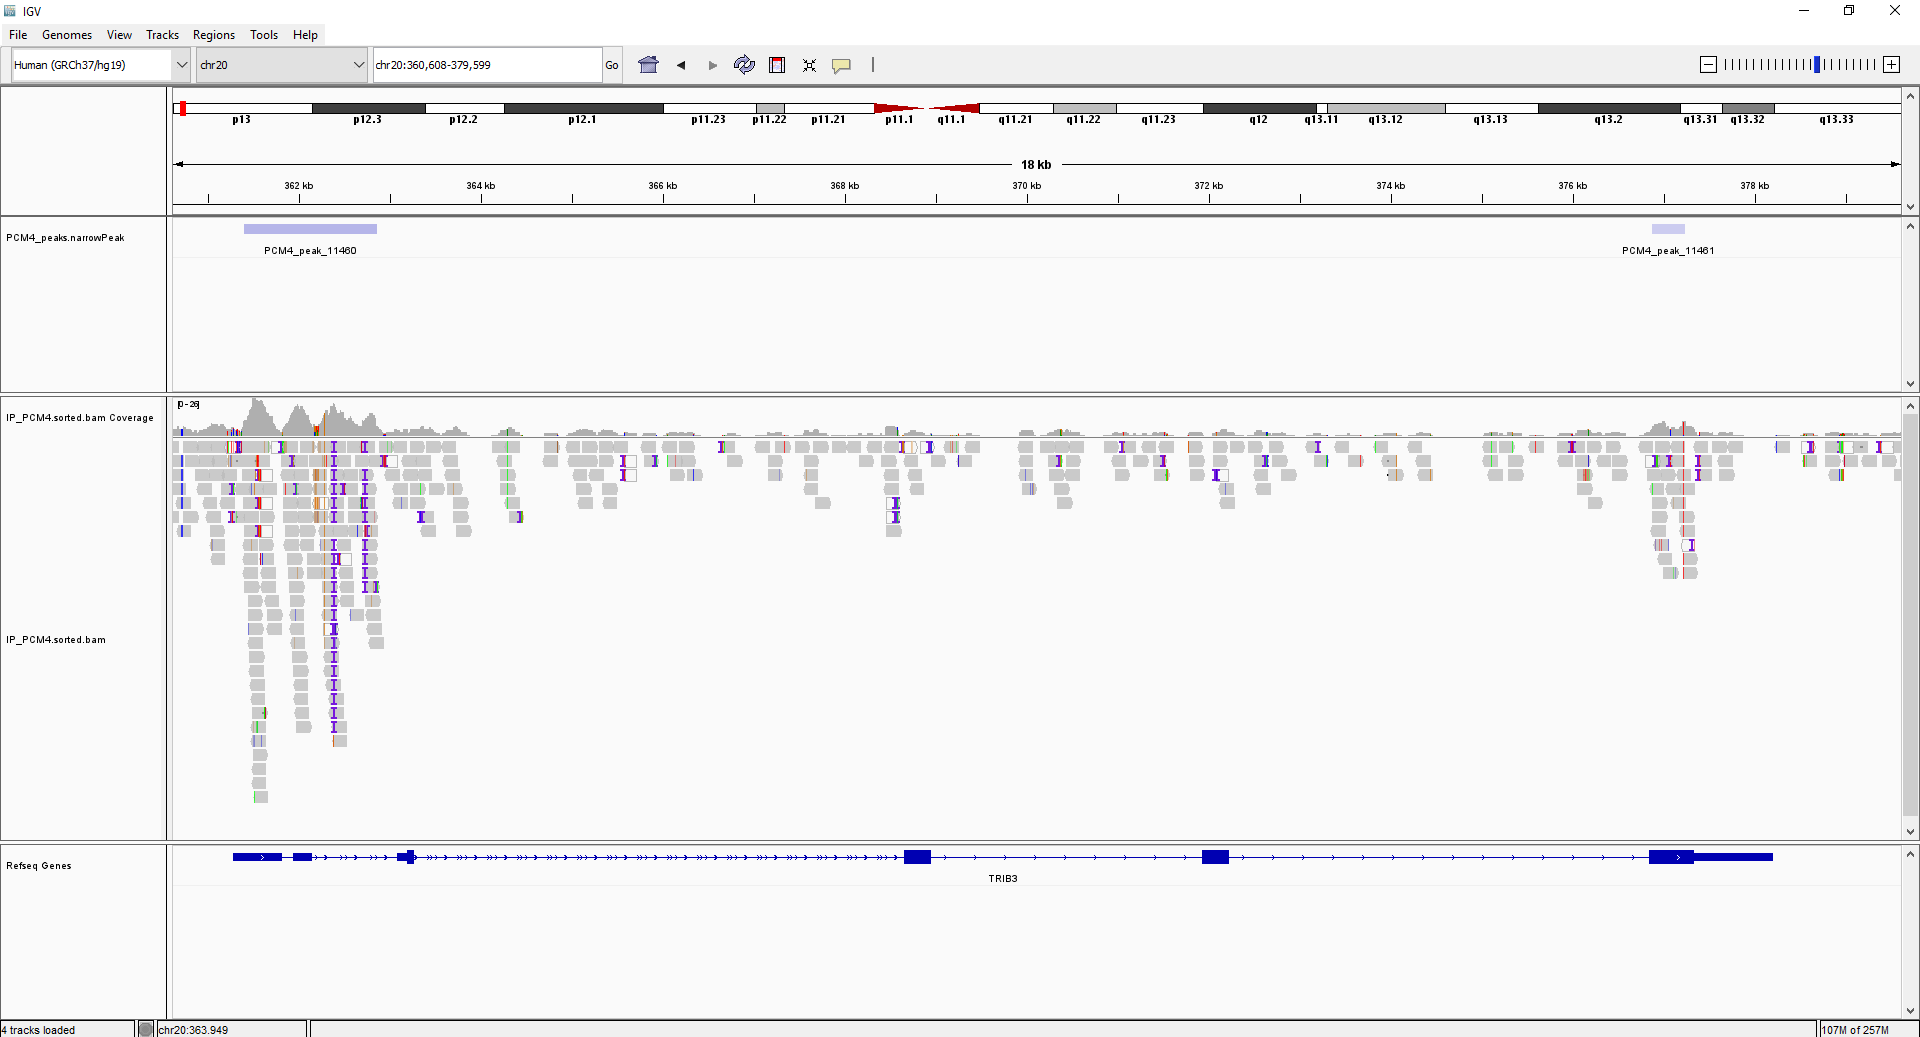

2) PCON narrowPeak file:

In [39]:
cat PCON_peaks.narrowPeak | wc -l  

24331


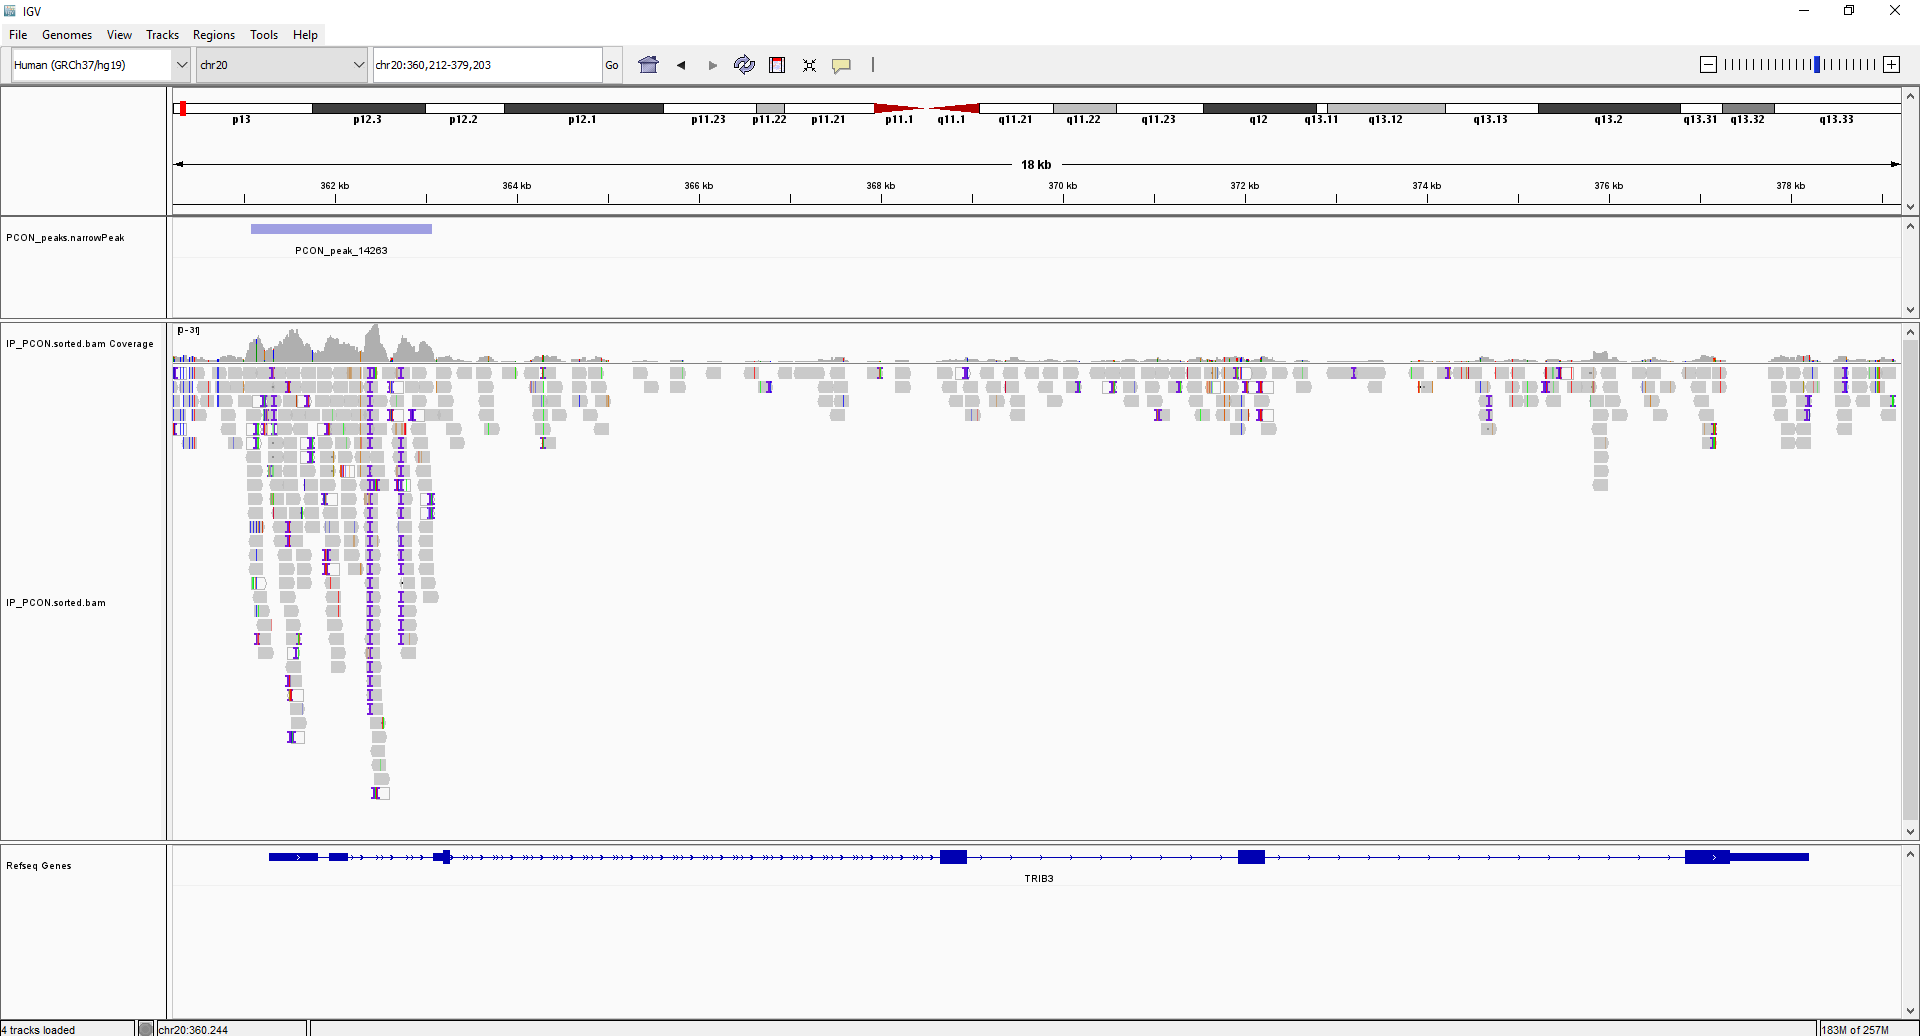

## 7. Heatmap
#### 7.1. PCM4

In [40]:
cat PCM4_peaks.narrowPeak | cut -f 1-3 > PCM4_fullpeaks.bed

In [41]:
computeMatrix reference-point \
    -S IP_PCM4_wholegenome.bw \
    -R PCM4_fullpeaks.bed \
    --referencePoint center \
    -a 2000 \
    -b 2000 \
    --binSize 5 \
    -out PCM4_wholegenome.tab.gz

In [42]:
plotHeatmap \
    -m PCM4_wholegenome.tab.gz \
    -out PCM4_wholegenome_peaks.png \
    --heatmapHeight 15  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal - PCM4'

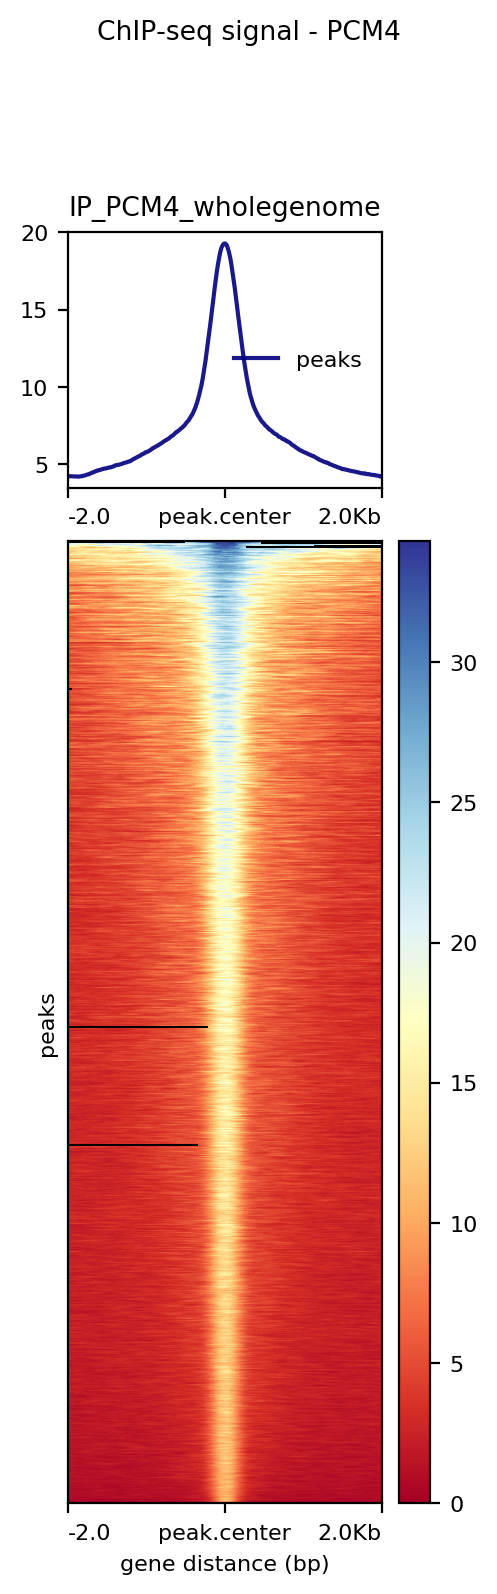

#### 7.2. PCON 

In [43]:
cat PCON_peaks.narrowPeak | cut -f 1-3 > PCON_fullpeaks.bed

In [44]:
computeMatrix reference-point \
    -S IP_PCON_wholegenome.bw \
    -R PCON_fullpeaks.bed \
    --referencePoint center \
    -a 2000 \
    -b 2000 \
    --binSize 5 \
    -out PCON_wholegenome.tab.gz

In [45]:
plotHeatmap \
    -m PCON_wholegenome.tab.gz \
    -out PCON_wholegenome_peaks.png \
    --heatmapHeight 15  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal - PCON'

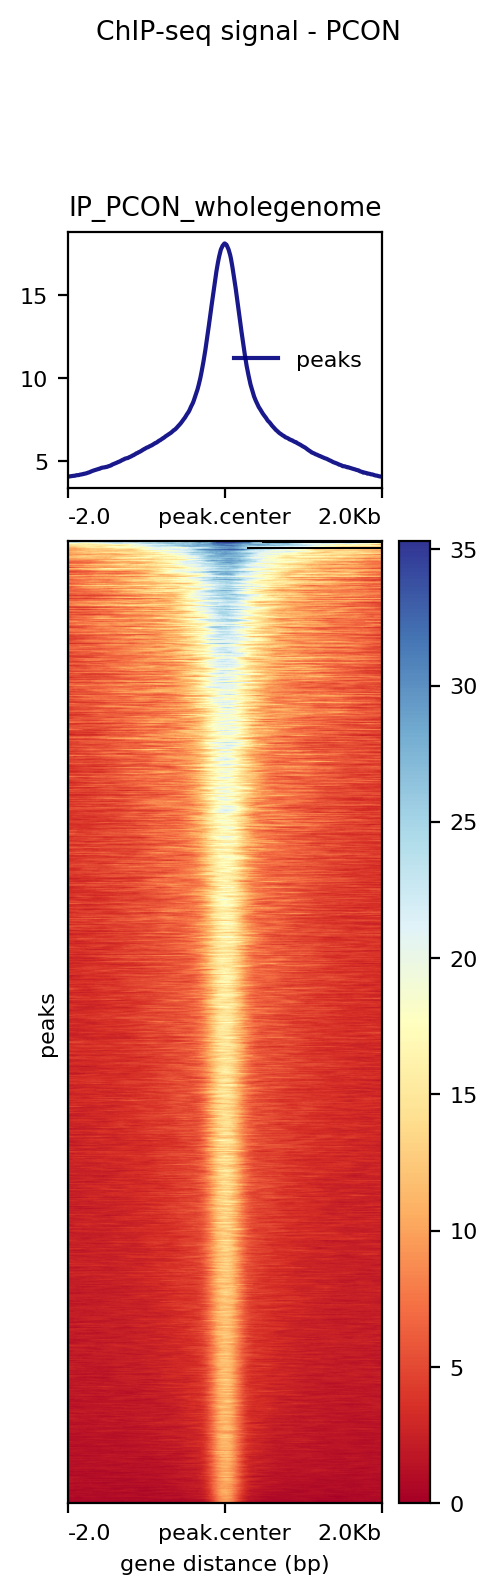

From the heatmaps, we can see that some of the peaks are very high (blue part at the top of the heatmap) and others are lower.

## 8. Motif Analysis 

#### 8.1. De Novo Motif discovery

Find the motifs from the peaks.

1) Run RSTAT peak-motife at the RSAT website: http://rsat.sb-roscoff.fr/

Go to Sequence tools, fetch-sequences form UCSC: 
* gene: hg19 - Human Feb. 2009 (CRCh37/hg19)
* file: PCM4_fullpeaks.bed
* email: irene.claes@student.kuleuven.be

GO to NGS-ChiP-seq, peak-motifs:
* file: fasta-file 
* email: irene.claes@student.kuleuven.be

RSAT peak-motig output:
I selected the lines form the fasta files of chromosome 20.

PCM4:
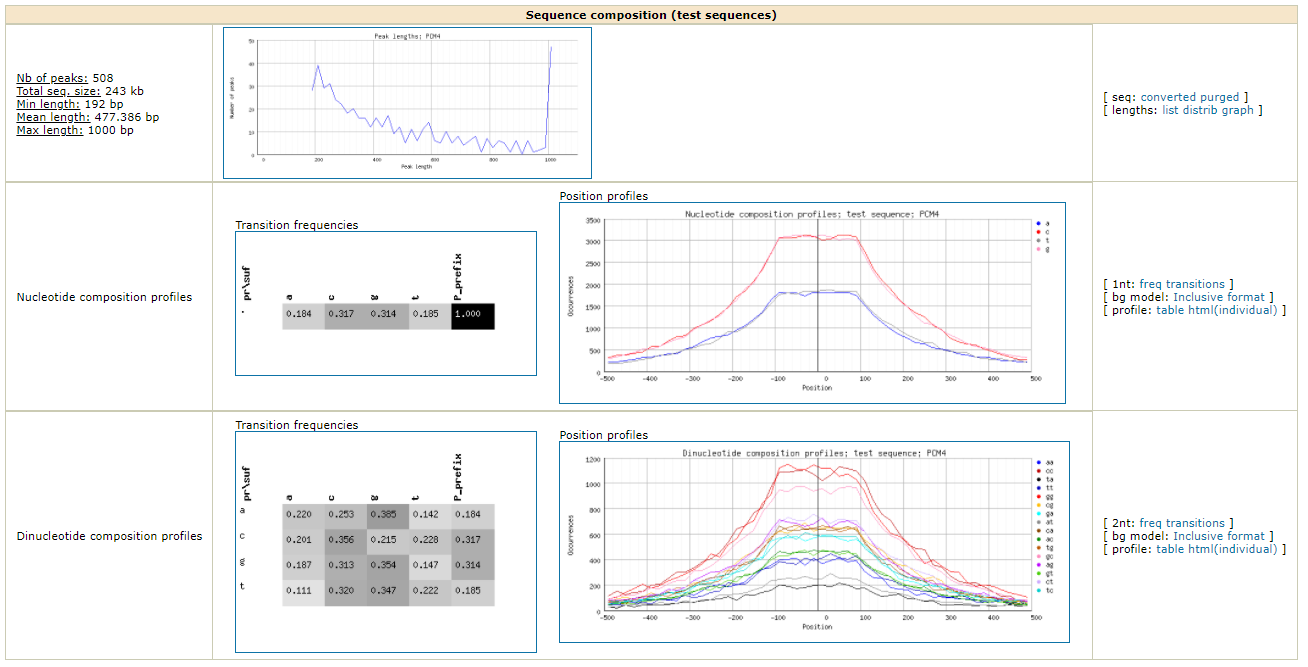

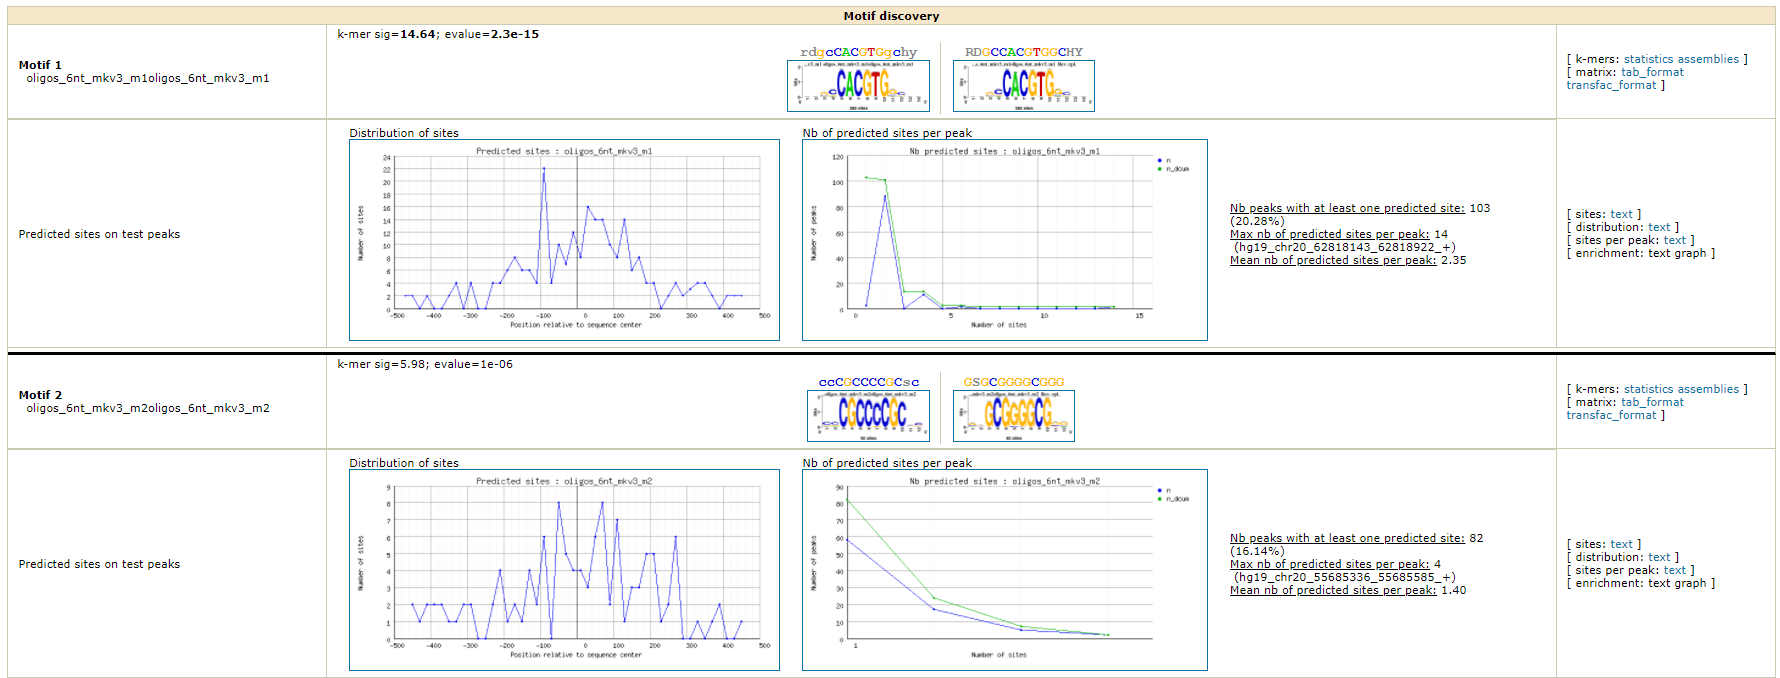

PCON:
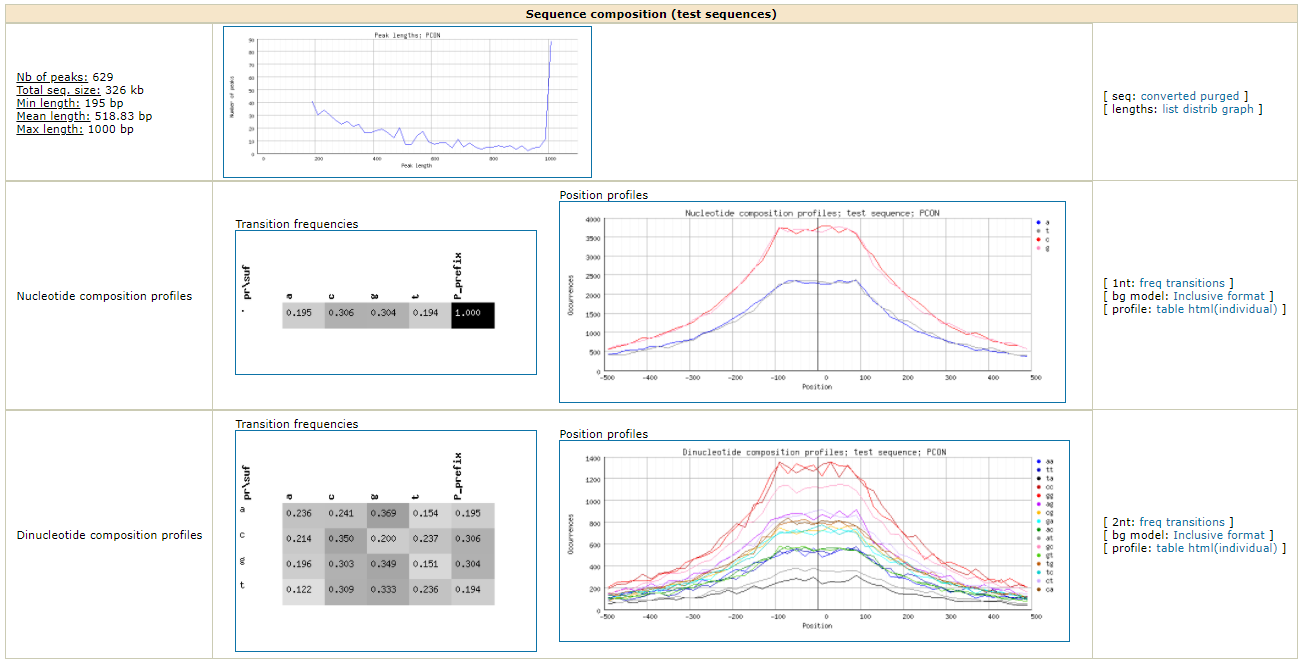

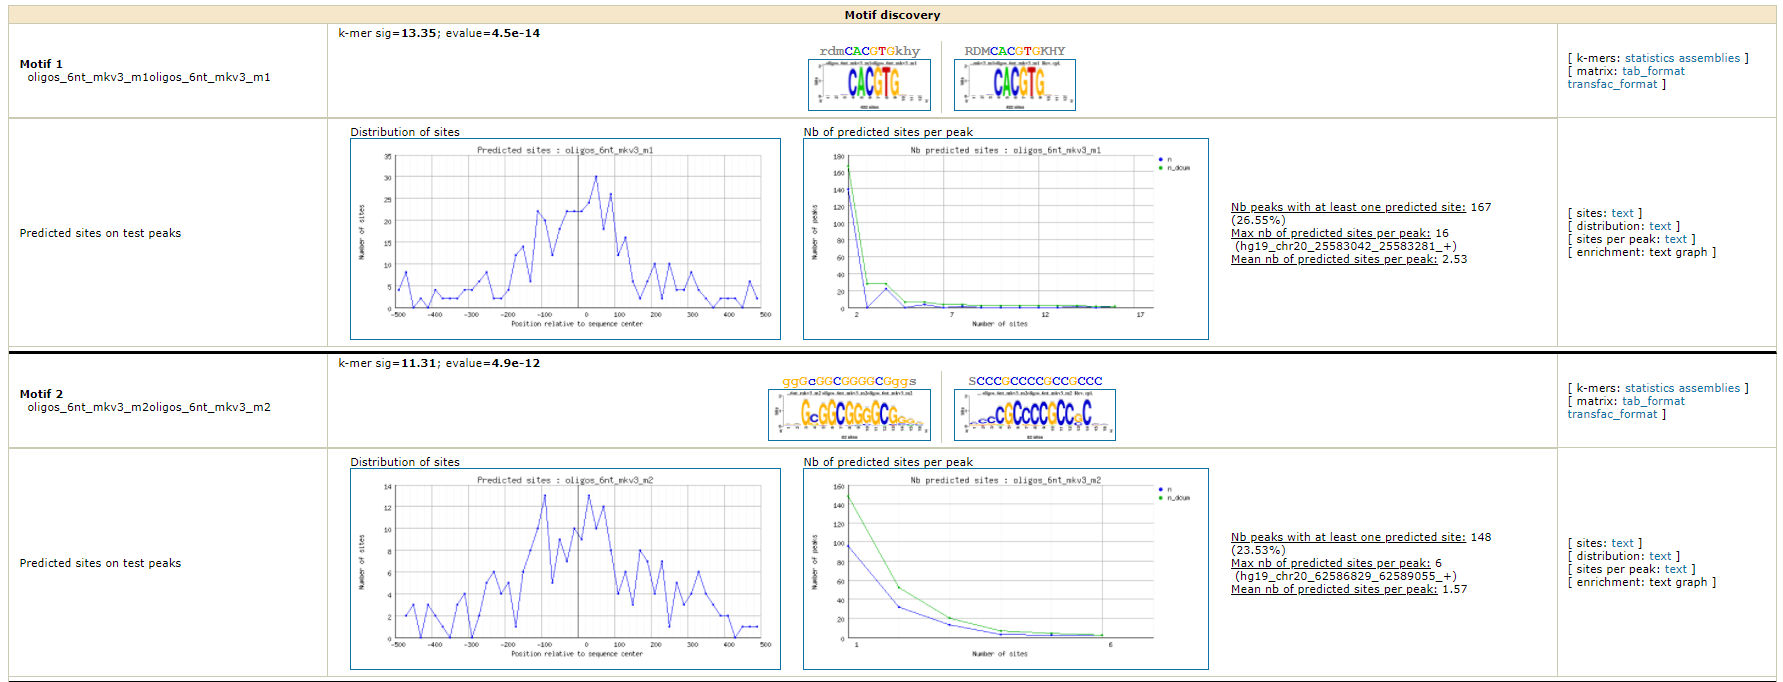

#### 8.2. Creating a BED file with only Direct peaks  
1) PCM4:

In [52]:
cat PCM4_peak-motifs_oligos_6nt_mkv2_m1_sites.tab | grep -v ";" | grep -v '#' | head

hg19_chr20_279083_280010_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	D	281	290	GCCCCAGCAC	7.6
hg19_chr20_304756_305471_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	R	322	331	GTCCCAGCTG	7.8
hg19_chr20_307142_308694_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	D	166	175	GTCCCAGCGG	7.6
hg19_chr20_356351_356542_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	D	-34	-25	ATCCCAGCAG	8.0
hg19_chr20_361397_362865_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	R	-427	-418	ATCCCAGCCC	7.9
hg19_chr20_1165323_1165894_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	D	-79	-70	GCCCCAGCAC	7.6
hg19_chr20_1447062_1447736_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	D	-28	-19	GTCCCAGCCG	7.9
hg19_chr20_2295079_2295301_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	D	57	66	GTCCCAGCTA	7.7
hg19_chr20_2632342_2634170_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	D	375	384	GTCCCAGCAT	7.9
hg19_chr20_3747975_3748440_+	site	oligos_6nt_mkv2_m1oligos_6nt_mkv2_m1	R	-70	-61	TCCCCAGCAC	7.6


In [53]:
cat PCM4_peak-motifs_oligos_6nt_mkv2_m1_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 | head

chr20	279083	280010
chr20	304756	305471
chr20	307142	308694
chr20	356351	356542
chr20	361397	362865
chr20	1165323	1165894
chr20	1447062	1447736
chr20	2295079	2295301
chr20	2632342	2634170
chr20	3747975	3748440


In [54]:
cat PCM4_peak-motifs_oligos_6nt_mkv2_m1_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 > TRIB3_PCM4-allpeaks-with-motif-RSAT.bed

2) PCON: 

In [55]:
cat PCON_peak-motifs_oligos_6nt_mkv3_m1_sites.tab.txt | grep -v ";" | grep -v '#' | head

hg19_chr20_247378_248051_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	-300	-289	GGCCACGTGAAG	7.9
hg19_chr20_247378_248051_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	R	-300	-289	CTTCACGTGGCC	7.9
hg19_chr20_278713_280049_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	470	481	CAACACGTGGTA	9.7
hg19_chr20_278713_280049_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	R	470	481	TACCACGTGTTG	9.7
hg19_chr20_304777_305824_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	-168	-157	TCACACGTGGTG	8.9
hg19_chr20_304777_305824_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	R	-168	-157	CACCACGTGTGA	8.9
hg19_chr20_342996_343437_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	67	78	GGACACGTGGTC	9.6
hg19_chr20_342996_343437_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	R	67	78	GACCACGTGTCC	9.6
hg19_chr20_1372777_1373766_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	D	-483	-472	TTACACGTGCAG	8.6
hg19_chr20_1372777_1373766_+	site	oligos_6nt_mkv3_m1oligos_6nt_mkv3_m1	R	-483	-472	CTGCACGTGTAA	8.6


In [56]:
cat PCON_peak-motifs_oligos_6nt_mkv2_m1_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 | head

chr20	278713	280049
chr20	278713	280049
chr20	304777	305824
chr20	304777	305824
chr20	342996	343437
chr20	342996	343437
chr20	1946361	1946688
chr20	1946361	1946688
chr20	2082140	2082821
chr20	2082140	2082821


In [57]:
cat PCON_peak-motifs_oligos_6nt_mkv2_m1_sites.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 > TRIB3_PCON-allpeaks-with-motif-RSAT.bed

## 9. Position Weight Matrices and track enrichment
* using i-cisTarget

#### 9.1. PCM4

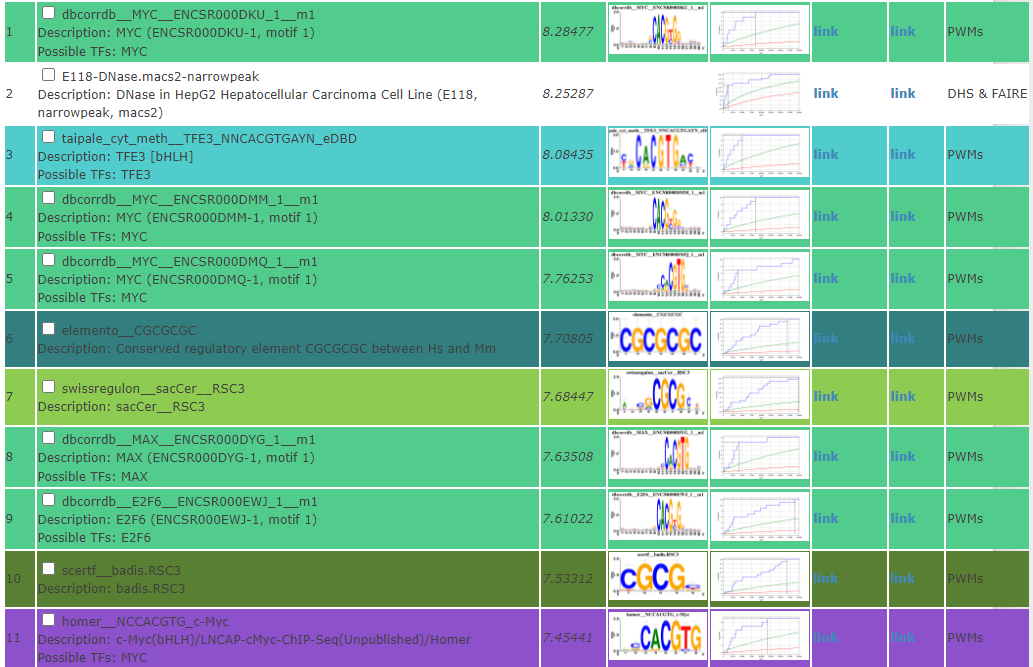

In [58]:
cat PCM4_dbcorrdb__MYC__ENCSR000DKU_1__m1.targets.bed | head

track name=dbcorrdb__MYC__ENCSR000DKU_1__m1_candidate_targets description="" useScore=1
chr20	279442	280105	chr20-reg111
chr20	2632041	2633306	chr20-reg2503
chr20	304990	306568	chr20-reg138
chr20	17949068	17950502	chr20-reg14052
chr20	2633577	2633924	chr20-reg2505
chr20	23330842	23332491	chr20-reg18277
chr20	1164445	1166520	chr20-reg1039
chr20	21282840	21284036	chr20-reg16801

Number of leading edges in the curve:

In [59]:
cat PCM4_dbcorrdb__MYC__ENCSR000DKU_1__m1.targets.bed | wc -l

8


#### 9.2. PCON

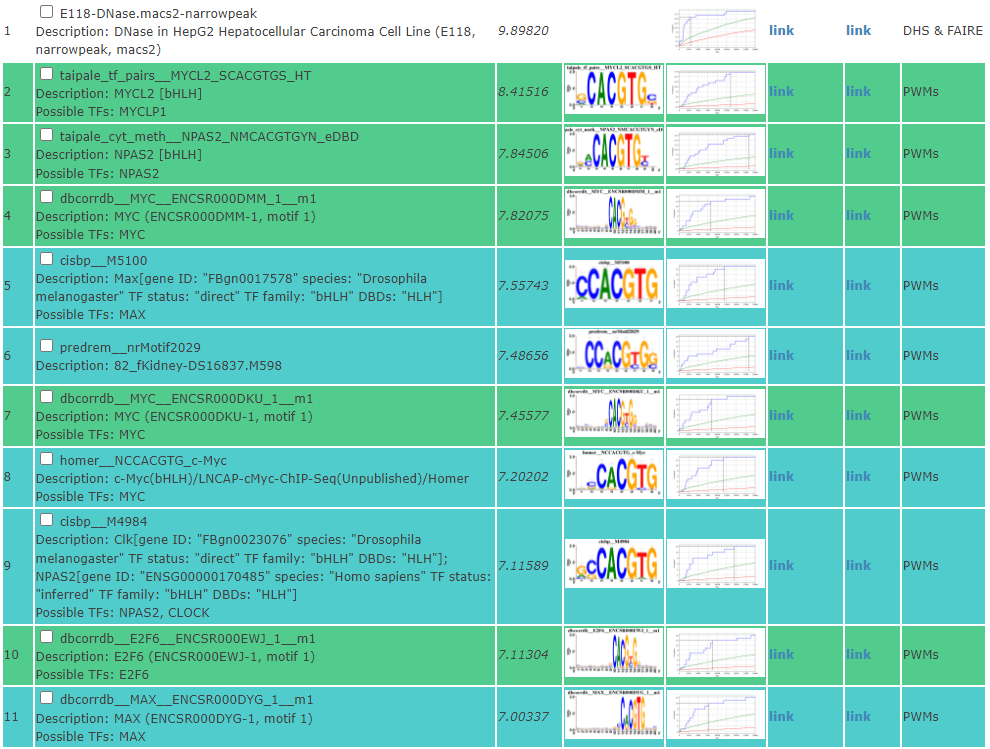

In [60]:
cat PCON_dbcorrdb__MYC__ENCSR000DMM_1__m1.targets.bed | head

track name=dbcorrdb__MYC__ENCSR000DMM_1__m1_candidate_targets description="" useScore=1
chr20	2730619	2732345	chr20-reg2608
chr20	279442	280105	chr20-reg111
chr20	2632041	2633306	chr20-reg2503
chr20	304990	306568	chr20-reg138
chr20	17949068	17950502	chr20-reg14052
chr20	2633577	2633924	chr20-reg2505
chr20	5931051	5932355	chr20-reg5825
chr20	3218710	3219740	chr20-reg3130
chr20	23330842	23332491	chr20-reg18277


In [61]:
cat PCON_dbcorrdb__MYC__ENCSR000DMM_1__m1.targets.bed | wc -l

12


## 10. Linking peaks to genes - GREAT
For this step we use Genomic Regions Enrichment of Annotations Tool (GREAT): http://great.stanford.edu/public/html/

#### 10.1. PCM4 associated genes:
I uploaded the PCM4_fullpeaks.bed file, hand changed the distance between peak and gene to 50 kb.

The GO biological processes that where found are: 

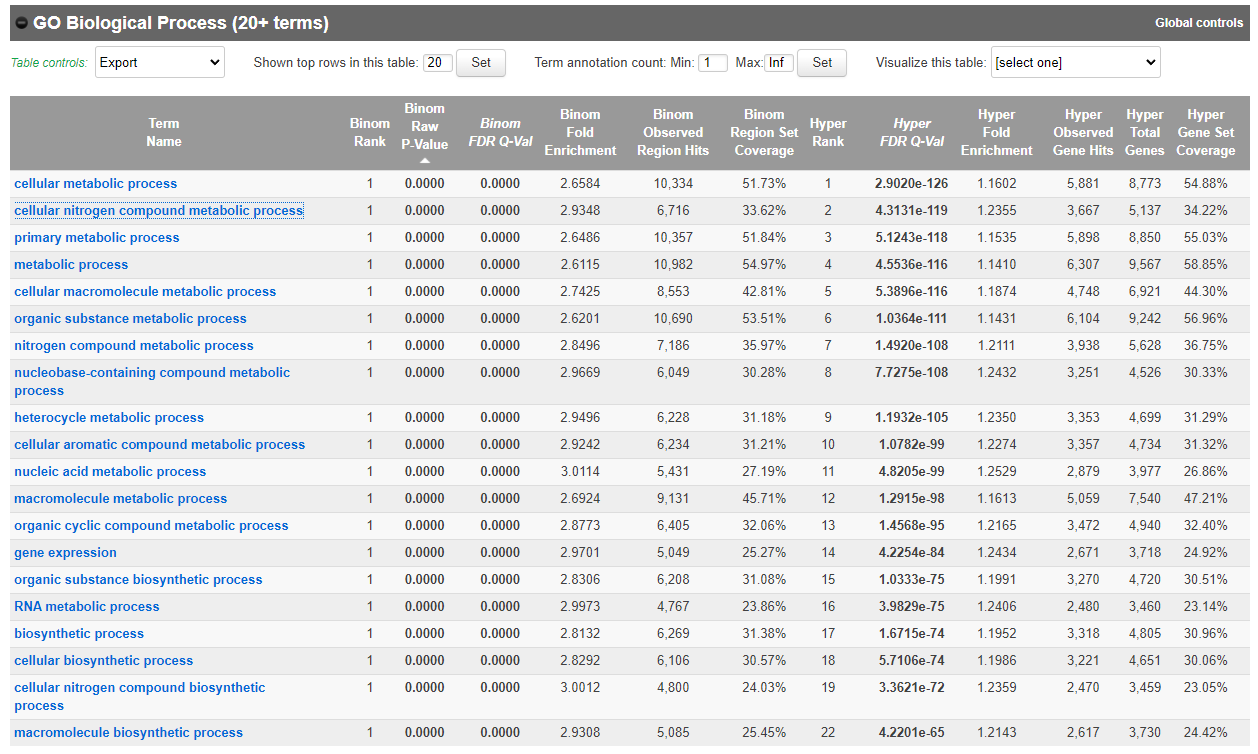

When I looked at the cellular metabolic process and the cellular nitrogen compound metabolic process, I found the associated genes with these GO Biological Processes. TRIB3 is one of the genes that were associated with these GO Biological Processes. 

I download this list as a .txt file.

Other are found here:

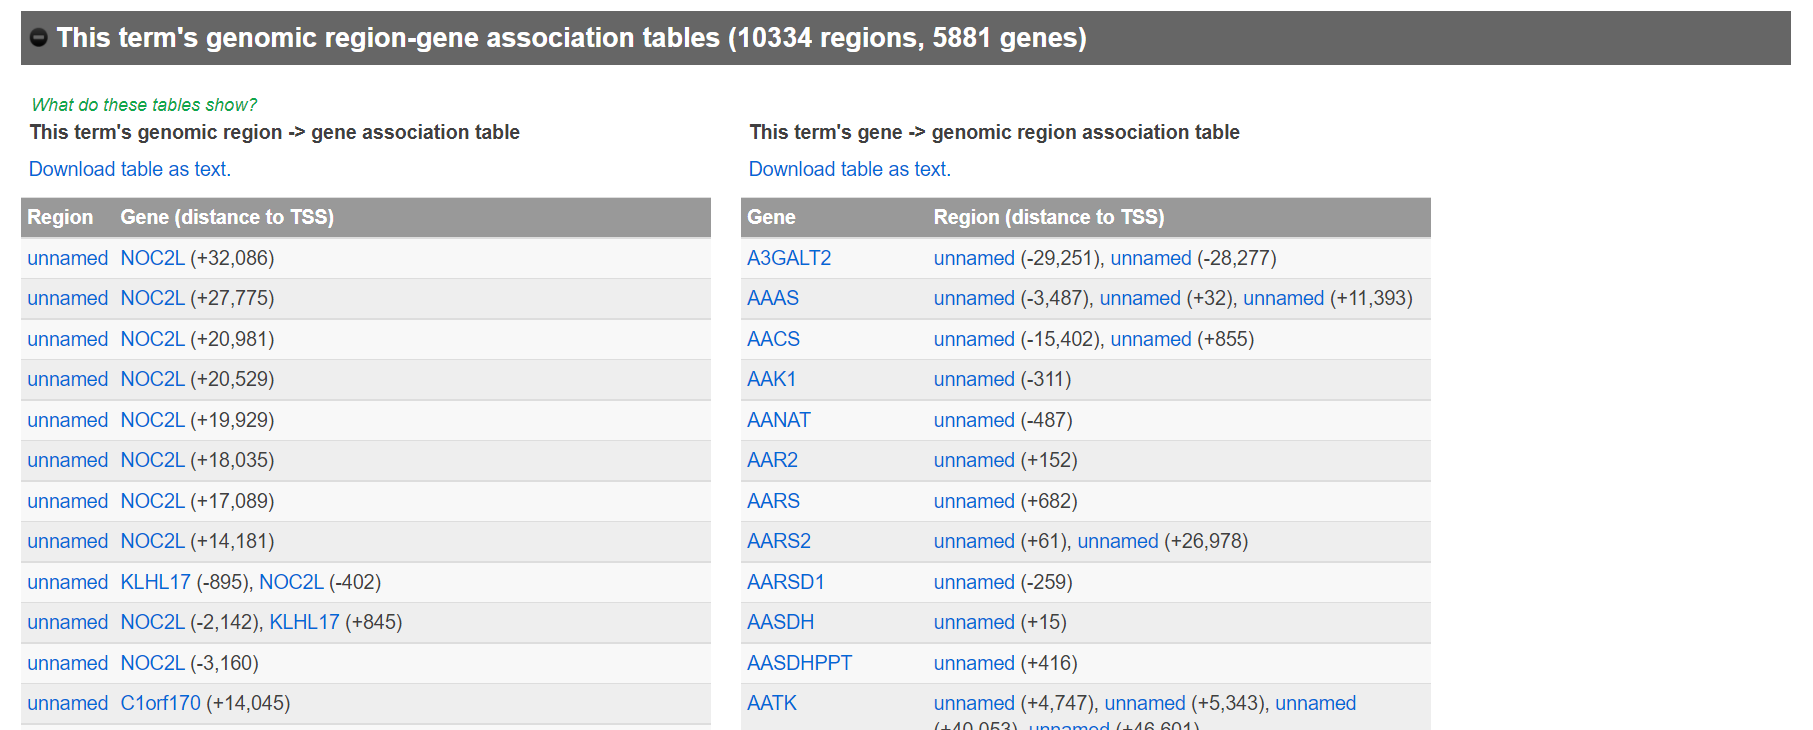

In [62]:
head 20211210-public-4.0.4-xsc8iF-hg19-GOBiologicalProcess-GO_0044237-gene.txt

# GREAT version 4.0.4	Species assembly: hg19	Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 50000 bp max extension, curated regulatory domains included
A3GALT2	unnamed (-29251), unnamed (-28277)
AAAS	unnamed (-3487), unnamed (+32), unnamed (+11393)
AACS	unnamed (-15402), unnamed (+855)
AAK1	unnamed (-311)
AANAT	unnamed (-487)
AAR2	unnamed (+152)
AARS	unnamed (+682)
AARS2	unnamed (+61), unnamed (+26978)
AARSD1	unnamed (-259)


How many genes there are in this list:

In [63]:
cat 20211210-public-4.0.4-xsc8iF-hg19-GOBiologicalProcess-GO_0044237-gene.txt | cut -f 1 | grep -v '#' | wc -l

5882


Create new file with these genes:

In [64]:
cat 20211210-public-4.0.4-xsc8iF-hg19-GOBiologicalProcess-GO_0044237-gene.txt | cut -f 1 | grep -v '#' > PCM4_genes_GREAT.txt

#### 10.2. PCON associated genes:

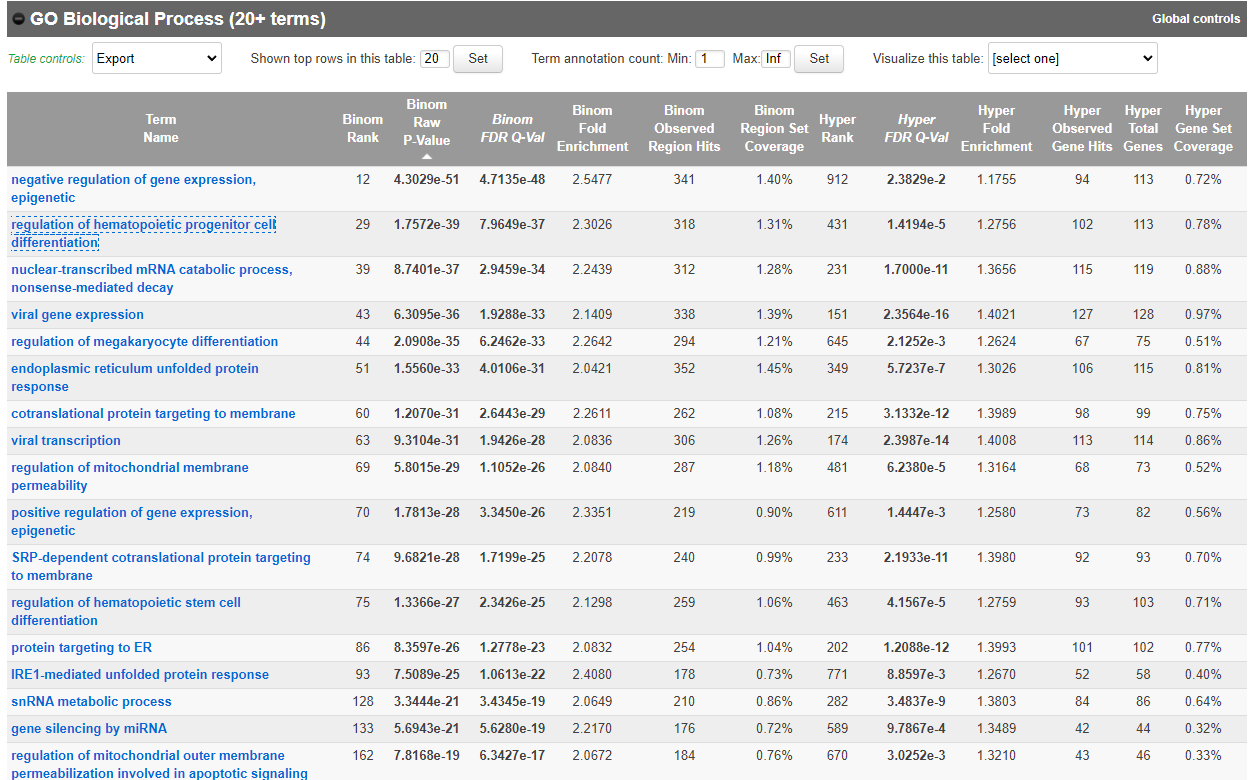

TRIB3 is not associated with these pathways.

In [65]:
head 20211210-public-4.0.4-BBcHeR-hg19-GOBiologicalProcess-GO_0045814-gene.txt

# GREAT version 4.0.4	Species assembly: hg19	Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 1000000 bp max extension, curated regulatory domains included
AEBP2	unnamed (-308722), unnamed (+276)
ARID1A	unnamed (-111467), unnamed (-75302), unnamed (-18313), unnamed (-2906), unnamed (-1807), unnamed (-299), unnamed (+1354), unnamed (+10497), unnamed (+26302), unnamed (+27447)
BAHD1	unnamed (-13924), unnamed (-3440), unnamed (-1569), unnamed (-766), unnamed (+81), unnamed (+948)
BAZ2A	unnamed (+930), unnamed (+1725), unnamed (+5169), unnamed (+6394)
BEND3	unnamed (-1513), unnamed (+66)
BMI1	unnamed (-4686), unnamed (+95), unnamed (+956), unnamed (+4156), unnamed (+4698)
CREBZF	unnamed (+603)
DNMT1	unnamed (-394), unnamed (+625)
DNMT3A	unnamed (-34522), unnamed (-17), unnamed (+90628), unnamed (+119899)


In [66]:
cat 20211210-public-4.0.4-BBcHeR-hg19-GOBiologicalProcess-GO_0045814-gene.txt | cut -f 1 | grep -v '#' | wc -l

95


In [67]:
cat 20211210-public-4.0.4-BBcHeR-hg19-GOBiologicalProcess-GO_0045814-gene.txt | cut -f 1 | grep -v '#' > PCON_genes_GREAT.txt

## 11. Predicted target genes and functional associations to MYC by using STRING
website: https://string-db.org/

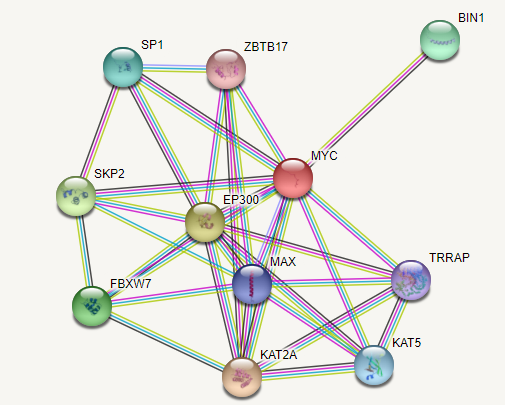

If we add more interactions:
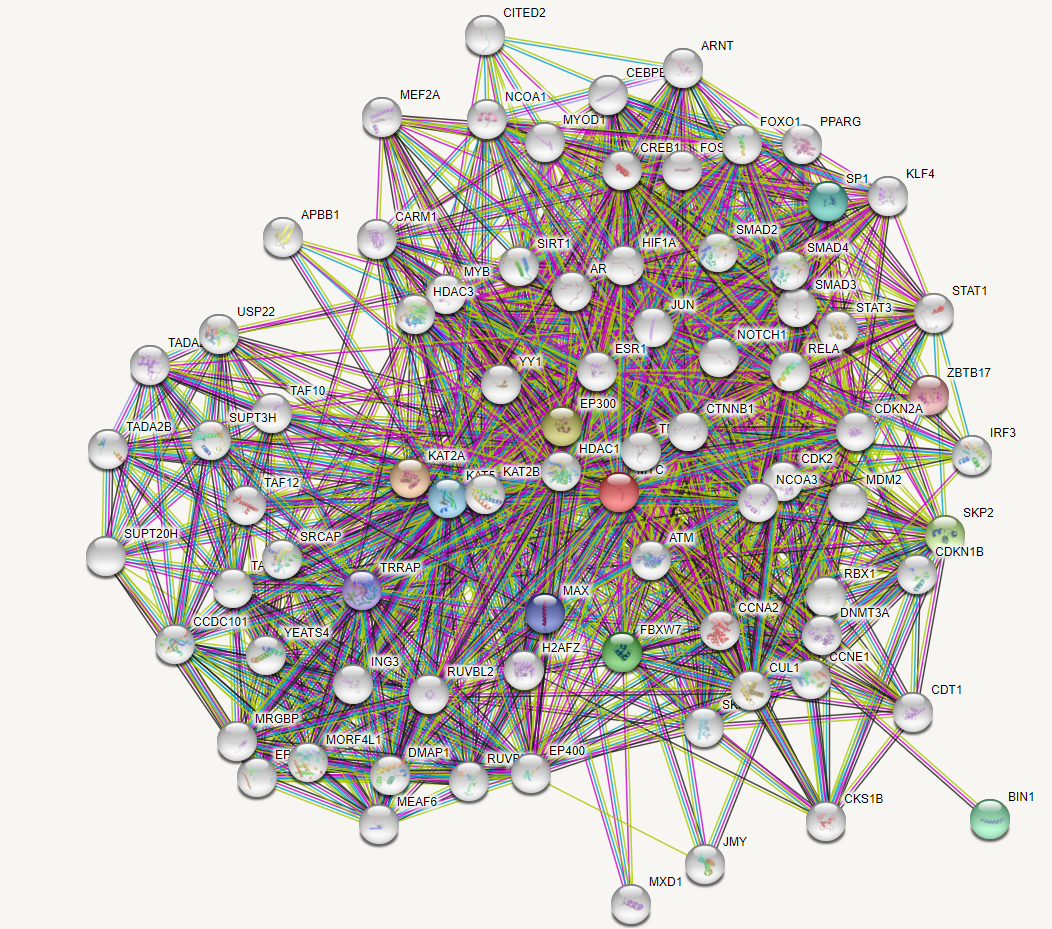

In [73]:
cat string_protein_annotations.tsv | cut -f 1 | head

#node
APBB1
ATM
BIN1
CCDC101
CCNA2
CCNE1
CDK2
CDKN1B
CDKN2A


In [84]:
cat string_protein_annotations.tsv | cut -f 1 | grep -v '#' > MYC_targets_STRING.txt

In [85]:
list=`cat MYC_targets_STRING.txt`

Compare with PCM4 targets of GREAT:

In [78]:
for i in $list; do grep -w $i PCM4_genes_GREAT.txt; done

ATM
CCDC101
CCNA2
CCNE1
CEBPB
CITED2
CREB1
CTNNB1
CUL1
DMAP1
EP300
EP400
EPC1
FBXW7
HDAC1
HIF1A
ING3
IRF3
JMY
JUN
KAT2A
KAT2B
KAT5
MAX
MDM2
MEF2A
MORF4L1
MXD1
MYB
MYC
NCOA1
NCOA3
NOTCH1
RELA
RUVBL1
RUVBL2
SIRT1
SKP1
SKP2
SMAD2
SMAD3
SP1
SRCAP
STAT1
STAT3
SUPT3H
TADA2A
TADA3
TAF10
TAF12
TP53
TRRAP
USP22
YEATS4
YY1
ZBTB17


In [79]:
for i in $list; do grep -w $i PCM4_genes_GREAT.txt; done > MYC_targets_PCM4.txt

Less gene interaction STRING:

In [93]:
cat string_protein_annotations_MYC_smaller.tsv | cut -f 1 

#node
BIN1
CCNE1
EP300
EPC1
FBXW7
KAT2A
KAT5
MAX
MDM2
MYC
MYOD1
RBX1
SIRT1
SKP1
SKP2
SMAD2
SP1
TRRAP
YEATS4
YY1
ZBTB17


In [86]:
cat string_protein_annotations_MYC_smaller.tsv | cut -f 1 | grep -v '#' > MYC_targets_STRING_small.txt

In [87]:
list=`cat MYC_targets_STRING_small.txt`

In [88]:
for i in $list; do grep -w $i PCM4_genes_GREAT.txt; done

CCNE1
EP300
EPC1
FBXW7
KAT2A
KAT5
MAX
MDM2
MYC
SIRT1
SKP1
SKP2
SMAD2
SP1
TRRAP
YEATS4
YY1
ZBTB17


Compare with PCON:

In [91]:
for i in $list; do grep -w $i PCON_genes_GREAT.txt; done

EPC1
SIRT1


: 1

There are far fewer genes associated with the genes in PCON than PCM4. The genes found could potentially be targets for new studies linked to the MYC gene.

## 12. Conclusion 
In the introduction I mentioned that MYC involved plays a role in cell cycle progression, apoptosis and cellular transformation. Similar to the findings in the article, peak-calling revealed that the TRIB3 gene along with the MYC gene were highly expressed over other genes.

During the peak coverage, several peaks were found across the whole genome. The focus was on chromosome 20 where the TRIB3 gene is located. Looking at chromosome 20, there are several high peaks located, where I focussed on peak 114600 (TRIB3).

Then I looked for motifs that could be linked to the peaks. rstat was used for this. This revealed the discovery of a motif. The sequence found was 5' GCCACGTGGC 3'. This sequence was linked to the MYC gene via the i-cisTarget website.

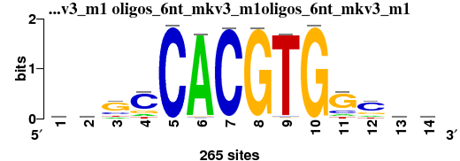

GO biological processes were found that were linked to the peaks found via the GREAT website, such as cellular metabolic process, cellular nitrogen compound metabolic process and primary metabolic process. These processes are linked to the MYC gene, but also to the TRIB3 gene.

Via the website STRING, several more genes were listed that interact with the MYC gene. These genes were compared to those found through the biological processes in GREAT. A number of genes were found that can be used as new targets in cancer studies.